# Peer e-Learning Project - OpenScience Course 

In [196]:
import pandas as pd
from pandas import DataFrame, read_csv   #conda install -c anaconda xlrd
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import gridspec
%matplotlib inline
from matplotlib import rcParams
import seaborn as sns
import numpy as np
import regex



# importing the libraries Correlation Theil's U
import math
from collections import Counter
import matplotlib.pyplot as plt
import scipy.stats as ss
import scipy.cluster.hierarchy as sch
import sklearn.preprocessing as sp
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from subprocess import check_output



# 1. Importing the data

In [2]:
# load the data from Google Drive
df = pd.read_csv('responses_PL2.csv')
df.head(2)

Unnamed: 0           Timestamp 1.connecting_PL  \
0           1  12/9/2020 10:19:30             Yes   
1           2  12/9/2020 11:03:28             Yes   

                                              2.Why? 3.PL_driven  \
0            No specific reason, it has always been.         Yes   
1  My current degree doesn't contain what I want ...         Yes   

                                      4.Online_tools 4.1.others_tools  \
0  Video meeting, Other , Could you name which on...              NaN   
1  Linkedin, Other , Could you name which ones pl...              NaN   

                                 5.why_use_PL_online  \
0                             Exchanging information   
1  Ask questions to other peers, unofficial tutor...   

  5.1.Others_reason_PL_online 6.People_outside  ... 10.use_socialmedia  \
0                         NaN     More than 11  ...                 No   
1                         NaN              2-5  ...                Yes   

  11.why_use_socialmedia  12.difficulties_PL  13.willdo_PL 14.PL_driven2  \
0                    NaN                 NaN           NaN   Self-driven   
1                    NaN                 NaN           NaN   Self-driven   

             15.track 16.gender 17.age  \
0  Master AIRE - DiSc    Female     29   
1  Master AIRE - DiSc    Female     22   

                                         18.info_add  \
0                Question 4 : Other is for Discord.    
1  I would like to say that in my case the enviro...   

                           19.email  
0       emilie.collin@cri-paris.org  
1  An optional required question...  

[2 rows x 24 columns]

In [3]:
df1 = df.groupby(by='16.gender').count()

In [4]:
df1

Unnamed: 0  Timestamp  1.connecting_PL  2.Why?  \
16.gender                                                           
Female                     19         19               19      19   
Male                       14         14               14      14   
Prefer not to say           2          2                2       2   

                   3.PL_driven  4.Online_tools  4.1.others_tools  \
16.gender                                                          
Female                      19              19                 6   
Male                        14              14                 3   
Prefer not to say            2               2                 1   

                   5.why_use_PL_online  5.1.Others_reason_PL_online  \
16.gender                                                             
Female                              19                            4   
Male                                14                            3   
Prefer not to say                    2                            0   

                   6.People_outside  ...  9.qualityPL  10.use_socialmedia  \
16.gender                            ...                                    
Female                           19  ...           19                  19   
Male                             14  ...           14                  14   
Prefer not to say                 2  ...            2                   2   

                   11.why_use_socialmedia  12.difficulties_PL  13.willdo_PL  \
16.gender                                                                     
Female                                 13                  13            13   
Male                                   12                  12            12   
Prefer not to say                       2                   2             2   

                   14.PL_driven2  15.track  17.age  18.info_add  19.email  
16.gender                                                                  
Female                        19        19      19            8        11  
Male                          14        14      14            3         8  
Prefer not to say              2         2       2            0         1  

[3 rows x 23 columns]

# 2. Exploring Data Analysis 

## 2.1. Gender distribution of the responses 

In [20]:
#Stabliching Rules Colors by MaxValue 
def clrs(series, max_color = '#ffa600', other_color = '#003f5c'):
    max_val = series.max()
    pal = []
    
    for item in series:
        if item == max_val:
            pal.append(max_color)
        else:
            pal.append(other_color)
    return pal


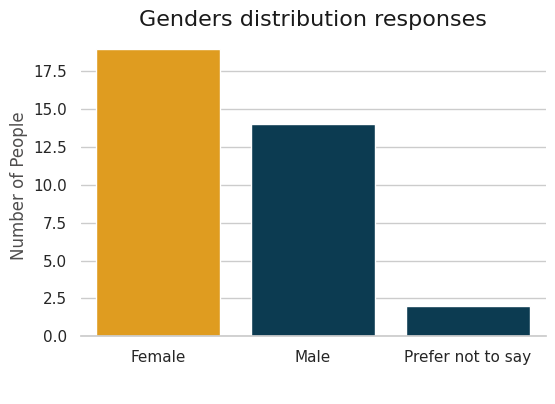

In [22]:
#Better resolution 
plt.rcParams['figure.dpi'] = 100

# Plotting the gender distribution 
ax = sns.barplot(x=df1.index, y='Unnamed: 0', data=df1, palette =clrs(df1['Unnamed: 0']))
# style
plt.xlabel("  ", alpha=0.75, size=18, color= "k" )
plt.ylabel('Number of People', size=12, color='#4f4e4e')
plt.title("Genders distribution responses", fontsize = 16, color ="k", )
sns.despine(left=True);

## 2.2.Gender distribution by educational program

In [10]:
data = df.copy()

In [11]:
df['15.track']

0     Master AIRE - DiSc
1     Master AIRE - DiSc
2     Master AIRE - LeSc
3     Master AIRE - DiSc
4     Master AIRE - LeSc
5     Master AIRE - LiSc
6     Master AIRE - LeSc
7     Master AIRE - LiSc
8     Master AIRE - LiSc
9         Bachelor - FDV
10    Master AIRE - LeSc
11    Master AIRE - LiSc
12    Master AIRE - DiSc
13    Master AIRE - LeSc
14    Master AIRE - DiSc
15    Master AIRE - LeSc
16    Master AIRE - LiSc
17    Master AIRE - LiSc
18    Master AIRE - LiSc
19            Researcher
20            Researcher
21    Master AIRE - LeSc
22        Bachelor - FDV
23    Master AIRE - LeSc
24    Master AIRE - LiSc
25    Master AIRE - DiSc
26            Researcher
27            Researcher
28        Bachelor - FDV
29                   PhD
30        Bachelor - FDV
31            Researcher
32            Researcher
33            Researcher
34    Master AIRE - LeSc
Name: 15.track, dtype: object

In [12]:
#creating the dataframes 
df2 = df[df['15.track'] == 'Master AIRE - DiSc']
df3 = df[df['15.track'] == 'Master AIRE - LiSc']
df4 = df[df['15.track'] == 'Master AIRE - LeSc']
df5 = df[df['15.track'] == 'Bachelor - FDV']
df6 = df[df['15.track'] == 'Researcher']
df7 = df[df['15.track'] == 'PhD']

In [13]:
df22 = df2.groupby(by='16.gender').count()
df33 = df3.groupby(by='16.gender').count()
df44 = df4.groupby(by='16.gender').count()
df55 = df5.groupby(by='16.gender').count()
df66 = df6.groupby(by='16.gender').count()
df77 = df7.groupby(by='16.gender').count()

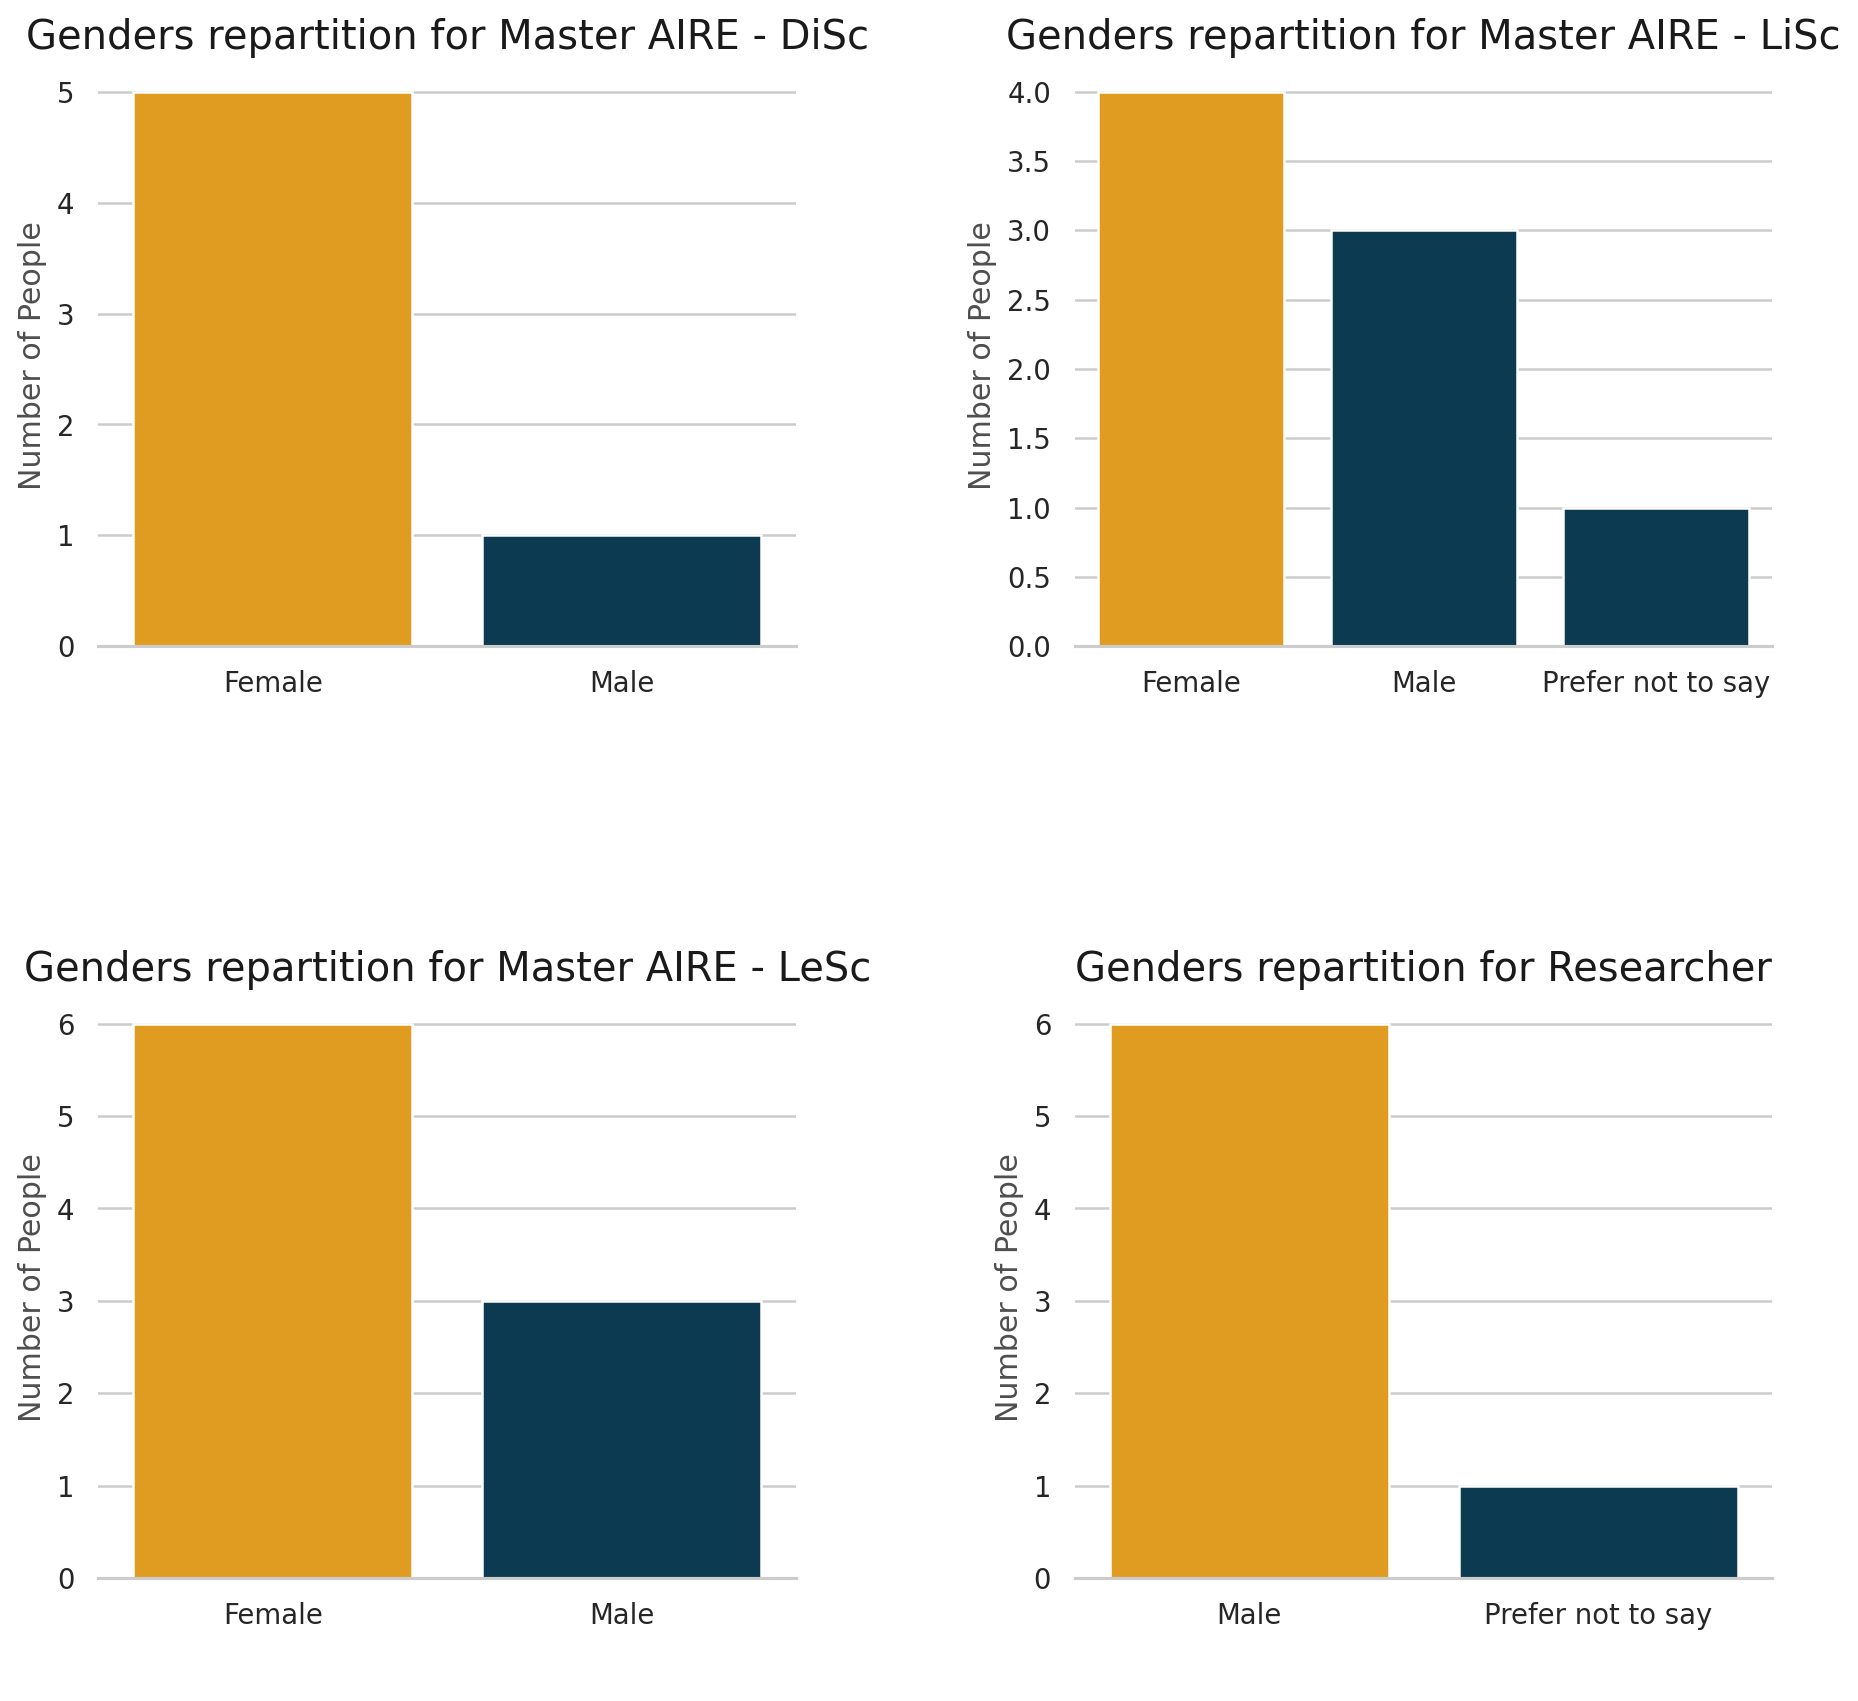

In [30]:
sns.set(style="whitegrid")
#sns.set_color_codes("Spectral")

# Increase the sharpness of the display
plt.rcParams['figure.dpi'] = 180

#configuration of subplots- 4 is the rows, 4 is columns 
fig= plt.figure(2, figsize=(12,18))
the_grid = gridspec.GridSpec(3, 2)

#Give space between the subplots 
fig.subplots_adjust(hspace=0.6, wspace=0.4)


#plot 1
plt.subplot(the_grid[0, 0])

ax = sns.barplot(x=df22.index, y='Unnamed: 0', data=df22, palette =clrs(df22['Unnamed: 0']))
#style 
plt.xlabel("  ", alpha=0.75, size=18, color= "k" )
plt.ylabel('Number of People', size=12, color='#4f4e4e')
plt.title("Genders repartition for Master AIRE - DiSc", fontsize = 16, color ="k", )


#Plot2
plt.subplot(the_grid[0, 1])

ax = sns.barplot(x=df33.index, y='Unnamed: 0', data=df33, palette =clrs(df33['Unnamed: 0']))
plt.xlabel("  ", alpha=0.75, size=18, color= "k" )
plt.ylabel('Number of People', size=12, color='#4f4e4e')
plt.title("Genders repartition for Master AIRE - LiSc", fontsize = 16, color ="k", )
sns.despine(left=True);

#plot3
plt.subplot(the_grid[1, 0])
ax = sns.barplot(x=df44.index, y='Unnamed: 0', data=df44, palette =clrs(df44['Unnamed: 0']))
plt.xlabel("  ", alpha=0.75, size=18, color= "k" )
plt.ylabel('Number of People', size=12, color='#4f4e4e')
plt.title("Genders repartition for Master AIRE - LeSc", fontsize = 16, color ="k", )
sns.despine(left=True);


#plot5
plt.subplot(the_grid[1, 1])
ax = sns.barplot(x=df66.index, y='Unnamed: 0', data=df66, palette =clrs(df66['Unnamed: 0']))
plt.xlabel("  ", alpha=0.75, size=18, color= "k" )
plt.ylabel('Number of People', size=12, color='#4f4e4e')
plt.title("Genders repartition for Researcher", fontsize = 16, color ="k", )
sns.despine(left=True);



## 2.3. Wraggling Data 

In [31]:
data.shape

(35, 24)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   35 non-null     int64 
 1   Timestamp                    35 non-null     object
 2   1.connecting_PL              35 non-null     object
 3   2.Why?                       35 non-null     object
 4   3.PL_driven                  35 non-null     object
 5   4.Online_tools               35 non-null     object
 6   4.1.others_tools             10 non-null     object
 7   5.why_use_PL_online          35 non-null     object
 8   5.1.Others_reason_PL_online  7 non-null      object
 9   6.People_outside             35 non-null     object
 10  6.1.People_CRI               33 non-null     object
 11  7.names                      35 non-null     object
 12  8.importancePL               35 non-null     int64 
 13  9.qualityPL                  35 non-n

In [33]:
# Change the date 
data ['Timestamp'] = pd.to_datetime(data['Timestamp'])

### Age Range 

In [34]:
maxi = data['17.age'].max()
mini = data['17.age'].min()
print ("The Age Range is between", mini, "-", maxi)

The Age Range is between 18 - 53


### Creating Age-range groups

In [35]:
# removing the letters from the numbers  in the column Age. example: 30s
df['age_new'] = df['17.age'].str.replace(r'\D', '').astype(int)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [36]:
# creating the Age range
bins= [18,26,36,46,55]
labels = ['18-25','26-35','36-45','46-55']
data['AgeGroup'] = pd.cut(df['age_new'], bins=bins, labels=labels, right=False)

In [37]:
d_age = data.groupby(['AgeGroup'])["Timestamp"].count()
d_age

AgeGroup
18-25    19
26-35    12
36-45     3
46-55     1
Name: Timestamp, dtype: int64

# 3. Exploring the Types of Learning 

In [38]:
# cleaning multiple answers and creating dummies variables
data_pl= data["5.why_use_PL_online"].str.get_dummies(sep=', ')
data_pl.head(3)

Ask questions to other peers  \
0                             0   
1                             1   
2                             1   

   Asking or giving assessment for others students work (Peer assessment)  \
0                                                  0                        
1                                                  0                        
2                                                  0                        

   CRI activities  (projects  Exchanging information  \
0                          0                       1   
1                          0                       0   
2                          1                       1   

   Forming a group/club to study about something together (Cooperative Learning)  \
0                                                  0                               
1                                                  0                               
2                                                  1                               

   Others  Working together in study groups (Peer collaboration)  \
0       0                                                  0       
1       1                                                  0       
2       0                                                  0       

   please!_______  seminars  tell us which ones  \
0               0         0                   0   
1               1         0                   1   
2               0         1                   0   

   unofficial tutoring class with peers (Peer tutoring )  workshops  
0                                                  0              0  
1                                                  1              0  
2                                                  1              1

In [39]:
data_pl.columns

Index(['Ask questions to other peers',
       'Asking or giving assessment for others students work (Peer assessment)',
       'CRI activities  (projects', 'Exchanging information',
       'Forming a group/club to study about something together (Cooperative Learning)',
       'Others', 'Working together in study groups (Peer collaboration)',
       'please!_______', 'seminars', 'tell us which ones',
       'unofficial tutoring class with peers (Peer tutoring )', 'workshops'],
      dtype='object')

To clean the open answers and aggregate them,  we need to explore the concepts of Peer learning methodologies.

**Concepts of Peer Learning:** 

* Reciprocal  peerlearning differs from peer tutoring in that the power and status of the students is similar and the emphasis is on learning together. 

* Cooperative learning and collaborative learning are  other  terms  often  used  in  relation  to  peer  learning.  While  these  terms  have  beenalmost   interchangeably   in   recent   literature,   their   use   has   emerged   from   differenteducational perspectives and often emphasised different outcomes.
(PDF) Designing peer learning. Available from: https://www.researchgate.net/publication/267822388_Designing_peer_learning [accessed Jan 18 2021].

* Other article 
https://helpfulprofessor.com/peer-learning/

In [40]:
#Change the name of columns 
data_pl= data_pl.rename(columns={'Asking or giving assessment for others students work (Peer assessment)':'Peer assessment',
                                   'CRI activities  (projects':'CRIseminars_workshops', 
                                   'Forming a group/club to study about something together (Cooperative Learning)': "Cooperative Learning", 
                                   'Working together in study groups (Peer collaboration)':"Peer collaboration", 
                                    'unofficial tutoring class with peers (Peer tutoring )': "Peer tutoring", 
                                    })



In [41]:
data_pl.columns

Index(['Ask questions to other peers', 'Peer assessment',
       'CRIseminars_workshops', 'Exchanging information',
       'Cooperative Learning', 'Others', 'Peer collaboration',
       'please!_______', 'seminars', 'tell us which ones', 'Peer tutoring',
       'workshops'],
      dtype='object')

#### Cleaning text data

In [42]:
#Removing featuring 
def remove_column(data_pl):
    return data_pl.drop(columns=[
        'please!_______',
        'seminars',
        'tell us which ones',
        'workshops'])

data_pl2 = remove_column(data_pl)
data_pl2.head(2)

Ask questions to other peers  Peer assessment  CRIseminars_workshops  \
0                             0                0                      0   
1                             1                0                      0   

   Exchanging information  Cooperative Learning  Others  Peer collaboration  \
0                       1                     0       0                   0   
1                       0                     0       1                   0   

   Peer tutoring  
0              0  
1              1

In [43]:
#cleaning  column "others peerlearning"
data["5.1.Others_reason_PL_online"].unique()

array([nan, 'To keep in touch with peers',
       'To relax a little and think about something else (after an exam) ',
       'sometimes, discussion or communication is a great way to inspire',
       'Collaborate on research projects',
       'Scientific collaborations (not study groups)',
       'Practice internship defenses',
       "To apply what I've learnt on projects for scientific and societal good"],
      dtype=object)

In [44]:
# Changing Open answers to concepts
#'Practice internship defenses' = exhancing information

data["5.1.Others_reason_PL_online"].replace(('sometimes, discussion or communication is a great way to inspire', 
                            'Collaborate on research projects', 
                            'Scientific collaborations (not study groups)', 
                            'Practice internship defenses'),
                            ("Peer discussion", 
                            "Peer collaboration", 
                            "Peer collaboratio1",
                            "Exchanging information1") , inplace=True)
                                         

In [45]:
#Cleaning data
data["5.1.Others_reason_PL_online"].replace(("Peer collaboration"), ("Peer collabroation2"), inplace = True)

## Creating dataframe for Peer Learning 

In [46]:
#Extracting information from a column, creating dataframe with dummies variables 
data_otherPL= data["5.1.Others_reason_PL_online"].str.get_dummies(sep=', ')
data_otherPL.head(2)

Exchanging information1  Peer collaboratio1  Peer collabroation2  \
0                        0                   0                    0   
1                        0                   0                    0   

   Peer discussion  \
0                0   
1                0   

   To apply what I've learnt on projects for scientific and societal good  \
0                                                  0                        
1                                                  0                        

   To keep in touch with peers  \
0                            0   
1                            0   

   To relax a little and think about something else (after an exam)   
0                                                  0                  
1                                                  0

In [47]:
#data_otherPL = data_otherPL1.rename(columns = {"Exchanging information":"Exchanging information2"})

In [48]:
data_otherPL.columns

Index(['Exchanging information1', 'Peer collaboratio1', 'Peer collabroation2',
       'Peer discussion',
       'To apply what I've learnt on projects for scientific and societal good',
       'To keep in touch with peers',
       'To relax a little and think about something else (after an exam) '],
      dtype='object')

## Adding two Dataframes: Other Peerlearning + Type of Peerlearning 

This dataframes came from the Close and Open Questions about Tools

In [49]:
#combine dataframe data_otherPL + data_pl2
type_pl = pd.concat([data_pl2, data_otherPL],axis=1)

In [50]:
type_pl.shape

(35, 15)

In [51]:
type_pl .columns

Index(['Ask questions to other peers', 'Peer assessment',
       'CRIseminars_workshops', 'Exchanging information',
       'Cooperative Learning', 'Others', 'Peer collaboration', 'Peer tutoring',
       'Exchanging information1', 'Peer collaboratio1', 'Peer collabroation2',
       'Peer discussion',
       'To apply what I've learnt on projects for scientific and societal good',
       'To keep in touch with peers',
       'To relax a little and think about something else (after an exam) '],
      dtype='object')

## Creating new columns: joining the data from different columns

In [52]:
type_pl ['Peer collabroation2'].unique()

array([0, 1])

In [53]:
#joing the data about collabtoation learning and exchanging information
type_pl["Collaboration Learning"] = type_pl['Peer collaboration'] + type_pl['Peer collaboratio1']+ type_pl["Peer collabroation2"]
type_pl["Exchanging info"] = type_pl['Exchanging information'] + type_pl["Exchanging information1"]

In [54]:
#cheking the categories. This Variable has an error. Need to be checked because has to be (0,1)
type_pl["Collaboration Learning"].unique()

array([0, 1, 2])

In [55]:
type_pl.columns

Index(['Ask questions to other peers', 'Peer assessment',
       'CRIseminars_workshops', 'Exchanging information',
       'Cooperative Learning', 'Others', 'Peer collaboration', 'Peer tutoring',
       'Exchanging information1', 'Peer collaboratio1', 'Peer collabroation2',
       'Peer discussion',
       'To apply what I've learnt on projects for scientific and societal good',
       'To keep in touch with peers',
       'To relax a little and think about something else (after an exam) ',
       'Collaboration Learning', 'Exchanging info'],
      dtype='object')

## Cleaning Text Data base on concepts of PeerLearning

In [56]:
#Cleaning columns 
type_pl3 = type_pl.drop(["Peer collaboration",'Peer collaboratio1', 'Peer collabroation2'
                        ],axis=1)

type_pl3.head(2) 


Ask questions to other peers  Peer assessment  CRIseminars_workshops  \
0                             0                0                      0   
1                             1                0                      0   

   Exchanging information  Cooperative Learning  Others  Peer tutoring  \
0                       1                     0       0              0   
1                       0                     0       1              1   

   Exchanging information1  Peer discussion  \
0                        0                0   
1                        0                0   

   To apply what I've learnt on projects for scientific and societal good  \
0                                                  0                        
1                                                  0                        

   To keep in touch with peers  \
0                            0   
1                            0   

   To relax a little and think about something else (after an exam)   \
0                                                  0                   
1                                                  0                   

   Collaboration Learning  Exchanging info  
0                       0                1  
1                       0                0

In [57]:
#Cleaning columns
type_pl4 = type_pl3.drop( ["To apply what I've learnt on projects for scientific and societal good",
                            'To keep in touch with peers',
                            'To relax a little and think about something else (after an exam) '], axis=1)

type_pl4.head(1)

Ask questions to other peers  Peer assessment  CRIseminars_workshops  \
0                             0                0                      0   

   Exchanging information  Cooperative Learning  Others  Peer tutoring  \
0                       1                     0       0              0   

   Exchanging information1  Peer discussion  Collaboration Learning  \
0                        0                0                       0   

   Exchanging info  
0                1

In [58]:
type_pl4.columns

Index(['Ask questions to other peers', 'Peer assessment',
       'CRIseminars_workshops', 'Exchanging information',
       'Cooperative Learning', 'Others', 'Peer tutoring',
       'Exchanging information1', 'Peer discussion', 'Collaboration Learning',
       'Exchanging info'],
      dtype='object')

In [59]:
#Cleaning columns
type_pl5 = type_pl4.drop(['Exchanging information','Exchanging information1'],axis=1)

## Final Dataframe-Type Peer Learning: type_pl5


In [60]:
#Final Dataframe for Type Peer Learning 
type_pl5.head(2)

Ask questions to other peers  Peer assessment  CRIseminars_workshops  \
0                             0                0                      0   
1                             1                0                      0   

   Cooperative Learning  Others  Peer tutoring  Peer discussion  \
0                     0       0              0                0   
1                     0       1              1                0   

   Collaboration Learning  Exchanging info  
0                       0                1  
1                       0                0

In [62]:
# Counting gender classes to validate the data
data["16.gender"].value_counts()

Female               19
Male                 14
Prefer not to say     2
Name: 16.gender, dtype: int64

# 4. Exploring the Tools Used in Peer Learning

Which are the Tools used in Peer learning by: 
- track
- gender
- Type of PL
- People_CRI
- range of age

### Creating the dataframe for Online Tools 

To create the dataframe for online tools is neccesary: 
- Create the datafrme of the responses of mulitple answer questions about online tools
- Create the dataframe of the responses of "Other Tools" and merge the dataframes

### Create the data frame for Online tools -Multiple answer question

In [63]:
# Tools using
data["4.Online_tools"].unique()

array(['Video meeting, Other , Could you name which ones please?',
       'Linkedin, Other , Could you name which ones please?',
       'Linkedin, E-mail, Other , Could you name which ones please?',
       'Twitter, Whatsapp, Rocketchat, Video meeting',
       'Whatsapp, Rocketchat, Video meeting, E-mail, Other , Could you name which ones please?',
       'Whatsapp, E-mail', 'Whatsapp, Video meeting',
       'Whatsapp, Video meeting, E-mail', 'Whatsapp',
       'Whatsapp, Video meeting, Others tools',
       'Twitter, Whatsapp, Rocketchat, Video meeting, E-mail',
       'Whatsapp, Linkedin, Rocketchat, E-mail', 'Whatsapp, Others tools',
       'Twitter, Whatsapp, Linkedin, Video meeting, E-mail, Others tools',
       'Whatsapp, Linkedin, Rocketchat, E-mail, Others tools',
       'Rocketchat, Video meeting, E-mail',
       'Whatsapp, Linkedin, Video meeting, E-mail',
       'Whatsapp, Video meeting, E-mail, Others tools',
       'Linkedin, Video meeting, E-mail', 'Linkedin',
       'Twi

In [64]:
#getting thee dataframe, creating the dummies variables
data_tools = data["4.Online_tools"].str.get_dummies(sep=', ')
data_tools.head(3)

Could you name which ones please?  E-mail  Linkedin  Other   Others tools  \
0                                  1       0         0       1             0   
1                                  1       0         1       1             0   
2                                  1       1         1       1             0   

   Rocketchat  Twitter  Video meeting  Whatsapp  
0           0        0              1         0  
1           0        0              0         0  
2           0        0              0         0

### Cleaning data and creating new variables

In [65]:
data_tools  = data_tools.drop(["Could you name which ones please?"], axis=1)

In [66]:
data_tools.columns

Index(['E-mail', 'Linkedin', 'Other ', 'Others tools', 'Rocketchat', 'Twitter',
       'Video meeting', 'Whatsapp'],
      dtype='object')

In [67]:
#joining equal information
data_tools["OtherTool"] = data_tools['Other ']+ data_tools['Others tools']

In [68]:
#cleaning the dataframe 
data_tools  = data_tools.drop(["Other "], axis=1)
data_tools  = data_tools.drop(['Others tools'], axis=1)

In [69]:
data_tools.columns

Index(['E-mail', 'Linkedin', 'Rocketchat', 'Twitter', 'Video meeting',
       'Whatsapp', 'OtherTool'],
      dtype='object')

### Creating the Dataframe of Other Tools 

In [70]:
# Tools mentioned by student in the questions "Other tools"
data["4.1.others_tools"].unique()

array([nan, 'Discord, Google Meet', 'google slides',
       "wechat, because in it's the most popular IM tool in China, I have many friends use it.( although I don't like it)",
       'Slack, Mattermost', 'Discord',
       'I follow some online blogs sharing projects or certificate courses',
       'Slack', 'discord', 'SMS', 'Dedicated discord server'],
      dtype=object)

In [71]:
#cleaning data others_tools 
data["4.1.others_tools"].replace(("I follow some online blogs sharing projects or certificate courses",
                                  "wechat, because in it's the most popular IM tool in China, I have many friends use it.( although I don't like it)", 
                                  "Dedicated discord server"), ("Blog", "Wechat", "Discord"), inplace=True)

In [72]:
#cleaning names of other tools 
data["4.1.others_tools"].replace(("google slides",
                                  "wechat", 
                                  "blog", 
                                  "discord"), ("GoogleDocs", "Wechat","Blogs","Discord"), inplace=True)


In [73]:
data["4.1.others_tools"].unique()

array([nan, 'Discord, Google Meet', 'GoogleDocs', 'Wechat',
       'Slack, Mattermost', 'Discord', 'Blog', 'Slack', 'SMS'],
      dtype=object)

In [74]:
#Set dummies x tools 
data_othertools = data["4.1.others_tools"].str.get_dummies(sep=', ')
data_othertools.head(3)


Blog  Discord  Google Meet  GoogleDocs  Mattermost  SMS  Slack  Wechat
0     0        0            0           0           0    0      0       0
1     0        0            0           0           0    0      0       0
2     0        0            0           0           0    0      0       0

In [75]:
data_othertools["Google Meet"].value_counts()

0    34
1     1
Name: Google Meet, dtype: int64

### Creating a unique dataframe with all the online tools: tools + other_tools

In [76]:
#using concat
PL_tools = pd.concat([data_tools, data_othertools],axis=1)

In [77]:
PL_tools.columns

Index(['E-mail', 'Linkedin', 'Rocketchat', 'Twitter', 'Video meeting',
       'Whatsapp', 'OtherTool', 'Blog', 'Discord', 'Google Meet', 'GoogleDocs',
       'Mattermost', 'SMS', 'Slack', 'Wechat'],
      dtype='object')

In [78]:
# Google meet is a VideoMeeting Tools. We decide to combine this column with the column Videomeeting from the dataframe data_tools
PL_tools["Video_Tools"] = PL_tools['Video meeting']+ PL_tools['Google Meet']

In [79]:
#cleaning the dataframe
PL_tools = PL_tools.drop(["Video meeting"], axis=1)
PL_tools = PL_tools.drop(["Google Meet"] , axis=1)

### Analyses of the Online Tools used in CRI community

In [81]:
#Complete dataframe, with all the responses of the survey
data_c = data

In [82]:
data_c.columns

In [83]:
#Dataframe of the online tools
PL_tools.columns

Index(['E-mail', 'Linkedin', 'Rocketchat', 'Twitter', 'Whatsapp', 'OtherTool',
       'Blog', 'Discord', 'GoogleDocs', 'Mattermost', 'SMS', 'Slack', 'Wechat',
       'Video_Tools'],
      dtype='object')

In [84]:
#combine dataframe Pl_tools + data_c
df_tools = pd.concat([data_c, PL_tools],axis=1)

In [85]:
#This dataframe contain open questions and close questions. It's necessary to drop some columns
df_tools.columns

Index(['Unnamed: 0', 'Timestamp', '1.connecting_PL', '2.Why?', '3.PL_driven',
       '4.Online_tools', '4.1.others_tools', '5.why_use_PL_online',
       '5.1.Others_reason_PL_online', '6.People_outside', '6.1.People_CRI',
       '7.names', '8.importancePL', '9.qualityPL', '10.use_socialmedia',
       '11.why_use_socialmedia', '12.difficulties_PL', '13.willdo_PL',
       '14.PL_driven2', '15.track', '16.gender', '17.age', '18.info_add',
       '19.email', 'AgeGroup', 'E-mail', 'Linkedin', 'Rocketchat', 'Twitter',
       'Whatsapp', 'OtherTool', 'Blog', 'Discord', 'GoogleDocs', 'Mattermost',
       'SMS', 'Slack', 'Wechat', 'Video_Tools'],
      dtype='object')

#### Creating a dataframe without open_question = df_tools_nq

In [86]:
#creating df_tools_c
#Removing open questions

def remove_data(df_tools):
    return df_tools.drop(columns=[
        '2.Why?',
        '4.Online_tools',
        '4.1.others_tools',
        '5.1.Others_reason_PL_online',
        '7.names',
        '11.why_use_socialmedia', 
        '12.difficulties_PL', 
        '13.willdo_PL',
        '18.info_add'])

df_tools_c = remove_data(df_tools)
print(df_tools_c.shape)


(35, 30)


In [87]:
df_tools_nq= df_tools_c.drop(["5.why_use_PL_online"] , axis=1)

In [88]:
df_tools_nq.columns

Index(['Unnamed: 0', 'Timestamp', '1.connecting_PL', '3.PL_driven',
       '6.People_outside', '6.1.People_CRI', '8.importancePL', '9.qualityPL',
       '10.use_socialmedia', '14.PL_driven2', '15.track', '16.gender',
       '17.age', '19.email', 'AgeGroup', 'E-mail', 'Linkedin', 'Rocketchat',
       'Twitter', 'Whatsapp', 'OtherTool', 'Blog', 'Discord', 'GoogleDocs',
       'Mattermost', 'SMS', 'Slack', 'Wechat', 'Video_Tools'],
      dtype='object')

In [89]:
df_tools_nq.shape

(35, 29)

## Final Dataframe: df_tools_nq. Tools + all the variables 
with all the questions and Online tools. This dataframe doesn´t have the peer learning techniques

## Visualizations of Online Tools 

#### Whar are the online tools used by 

In [90]:
#Removing featuring in df_tools_nq

def remove_features(df_tools_nq):
    return df_tools_nq.drop(columns=[
        '6.People_outside',
        '6.1.People_CRI',
        '10.use_socialmedia',
         '8.importancePL','Unnamed: 0','9.qualityPL'])

df_tools_nq1 = remove_features(df_tools_nq)
print(df_tools_nq1.shape)

#Don´t run after remove the columns 

df_tools_nq1.head(5)

(35, 23)


Timestamp 1.connecting_PL 3.PL_driven 14.PL_driven2  \
0 2020-12-09 10:19:30             Yes         Yes   Self-driven   
1 2020-12-09 11:03:28             Yes         Yes   Self-driven   
2 2020-12-09 14:04:40              No         Yes          Both   
3 2020-12-09 14:11:55              No          No      Teachers   
4 2020-12-09 14:18:56             Yes        Both          Both   

             15.track 16.gender 17.age                          19.email  \
0  Master AIRE - DiSc    Female     29       emilie.collin@cri-paris.org   
1  Master AIRE - DiSc    Female     22  An optional required question...   
2  Master AIRE - LeSc    Female     24                     (This either)   
3  Master AIRE - DiSc    Female     21                                 /   
4  Master AIRE - LeSc    Female     29                                 -   

  AgeGroup  E-mail  ...  Whatsapp  OtherTool  Blog  Discord  GoogleDocs  \
0    26-35       0  ...         0          1     0        0           0   
1    18-25       0  ...         0          1     0        0           0   
2    18-25       1  ...         0          1     0        0           0   
3    18-25       0  ...         1          0     0        0           0   
4    26-35       1  ...         1          1     0        0           0   

   Mattermost  SMS  Slack  Wechat  Video_Tools  
0           0    0      0       0            1  
1           0    0      0       0            0  
2           0    0      0       0            0  
3           0    0      0       0            1  
4           0    0      0       0            1  

[5 rows x 23 columns]

In [91]:
df_tools_nq1.columns

Index(['Timestamp', '1.connecting_PL', '3.PL_driven', '14.PL_driven2',
       '15.track', '16.gender', '17.age', '19.email', 'AgeGroup', 'E-mail',
       'Linkedin', 'Rocketchat', 'Twitter', 'Whatsapp', 'OtherTool', 'Blog',
       'Discord', 'GoogleDocs', 'Mattermost', 'SMS', 'Slack', 'Wechat',
       'Video_Tools'],
      dtype='object')

In [92]:
df_tools_nq.shape

(35, 29)

In [93]:
#Removing featuring 

def remove_features(df_tools):
    return df_tools.drop(columns=[
        '2.Why?',
        '4.Online_tools',
        '4.1.others_tools',
        '5.1.Others_reason_PL_online',
        '7.names',
        '11.why_use_socialmedia', 
        '12.difficulties_PL', 
        '13.willdo_PL',
        '18.info_add'])

df_tools2 = remove_features(df_tools)
print(df_tools2.shape)

#Don´t run after remove the columns 

(35, 30)


In [94]:
df_tools2.columns

Index(['Unnamed: 0', 'Timestamp', '1.connecting_PL', '3.PL_driven',
       '5.why_use_PL_online', '6.People_outside', '6.1.People_CRI',
       '8.importancePL', '9.qualityPL', '10.use_socialmedia', '14.PL_driven2',
       '15.track', '16.gender', '17.age', '19.email', 'AgeGroup', 'E-mail',
       'Linkedin', 'Rocketchat', 'Twitter', 'Whatsapp', 'OtherTool', 'Blog',
       'Discord', 'GoogleDocs', 'Mattermost', 'SMS', 'Slack', 'Wechat',
       'Video_Tools'],
      dtype='object')

In [95]:
#df_tools22 = df_tools2[['3.PL_driven','Video_Tools']]
#df_tools22.groupby('3.PL_driven').sum()
df_tools2= df_tools2.groupby(by='3.PL_driven').sum()

In [96]:
df_tools2=df_tools2.drop(['8.importancePL','Unnamed: 0','9.qualityPL','Discord','SMS','Slack','Wechat'], axis=1)

In [97]:
df_tools2.head()


E-mail  Linkedin  Rocketchat  Twitter  Whatsapp  OtherTool  Blog  \
3.PL_driven                                                                     
Both              9         4           3        0        14          6     0   
No                2         3           2        1         3          2     0   
Yes              10         6           5        4         8          5     1   

             GoogleDocs  Mattermost  Video_Tools  
3.PL_driven                                       
Both                  0           1           10  
No                    1           0            1  
Yes                   0           0            8

In [98]:
plt.figure(figsize=(20,10))
sns.barplot(data=df_tools2,ci=None, data= df_track_pl2, palette =clrs(df_track_pl2["CRIseminars_workshops"]))  )
plt.xlabel("  ", alpha=0.75 , color= "k" )
plt.ylabel('Number of people', size=20, color='#4f4e4e')
plt.title("Usage of the different tools", fontsize = 16, color ="k", )
sns.despine(left=True);

SyntaxError: invalid syntax (<ipython-input-98-c329abc8aeb0>, line 2)

NameError: name 'df_track_pl2' is not defined

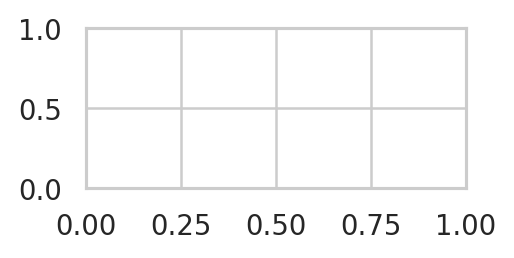

In [99]:
#plot1
plt.subplot(the_grid[0, 0])
sns.barplot(x='15.track',y='CRIseminars_workshops', data= df_track_pl2, palette =clrs(df_track_pl2["CRIseminars_workshops"])) 
#style


In [100]:
df_tools2

E-mail  Linkedin  Rocketchat  Twitter  Whatsapp  OtherTool  Blog  \
3.PL_driven                                                                     
Both              9         4           3        0        14          6     0   
No                2         3           2        1         3          2     0   
Yes              10         6           5        4         8          5     1   

             GoogleDocs  Mattermost  Video_Tools  
3.PL_driven                                       
Both                  0           1           10  
No                    1           0            1  
Yes                   0           0            8

# Merging Dataframe: Creating a Dataframe Complete: df_main_t

This dataframe include the variables: Tools + Types of Peer Learning + All the variables


In [103]:
# Peer Learning Categories 
# data_c is the copy of "data"
#type_pl5 is the df with the types of Peer Learning 
#df_tools_nq is the df with all the online tools, others tools and variables of the other answers 
#main dataframe  = df_tools_nq + type_pl5
# after remove columns and create the age scale 


#combine dataframe 
df_main_t = pd.concat([df_tools_nq, type_pl5],axis=1)

In [104]:
df_main_t.head(3)

Unnamed: 0           Timestamp 1.connecting_PL 3.PL_driven  \
0           1 2020-12-09 10:19:30             Yes         Yes   
1           2 2020-12-09 11:03:28             Yes         Yes   
2           3 2020-12-09 14:04:40              No         Yes   

  6.People_outside 6.1.People_CRI  8.importancePL  9.qualityPL  \
0     More than 11            NaN               5            5   
1              2-5            2-5               4            5   
2             5-10           5-10               3            4   

  10.use_socialmedia 14.PL_driven2  ... Video_Tools  \
0                 No   Self-driven  ...           1   
1                Yes   Self-driven  ...           0   
2                 No          Both  ...           0   

  Ask questions to other peers Peer assessment CRIseminars_workshops  \
0                            0               0                     0   
1                            1               0                     0   
2                            1               0                     1   

  Cooperative Learning  Others  Peer tutoring  Peer discussion  \
0                    0       0              0                0   
1                    0       1              1                0   
2                    1       0              1                0   

   Collaboration Learning  Exchanging info  
0                       0                1  
1                       0                0  
2                       0                1  

[3 rows x 38 columns]

In [105]:
df_main_t.columns

Index(['Unnamed: 0', 'Timestamp', '1.connecting_PL', '3.PL_driven',
       '6.People_outside', '6.1.People_CRI', '8.importancePL', '9.qualityPL',
       '10.use_socialmedia', '14.PL_driven2', '15.track', '16.gender',
       '17.age', '19.email', 'AgeGroup', 'E-mail', 'Linkedin', 'Rocketchat',
       'Twitter', 'Whatsapp', 'OtherTool', 'Blog', 'Discord', 'GoogleDocs',
       'Mattermost', 'SMS', 'Slack', 'Wechat', 'Video_Tools',
       'Ask questions to other peers', 'Peer assessment',
       'CRIseminars_workshops', 'Cooperative Learning', 'Others',
       'Peer tutoring', 'Peer discussion', 'Collaboration Learning',
       'Exchanging info'],
      dtype='object')

In [106]:
df_main_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Unnamed: 0                    35 non-null     int64         
 1   Timestamp                     35 non-null     datetime64[ns]
 2   1.connecting_PL               35 non-null     object        
 3   3.PL_driven                   35 non-null     object        
 4   6.People_outside              35 non-null     object        
 5   6.1.People_CRI                33 non-null     object        
 6   8.importancePL                35 non-null     int64         
 7   9.qualityPL                   35 non-null     int64         
 8   10.use_socialmedia            35 non-null     object        
 9   14.PL_driven2                 35 non-null     object        
 10  15.track                      35 non-null     object        
 11  16.gender                     35 n

In [107]:
#remove email columns
df_main_t=df_main_t.drop(['19.email'], axis=1)

#### Cleaning the names of educational programs

In [108]:
df_main_t['15.track'].unique()

array(['Master AIRE - DiSc', 'Master AIRE - LeSc', 'Master AIRE - LiSc',
       'Bachelor - FDV', 'Researcher', 'PhD'], dtype=object)

In [109]:
### Changing educational programs names
df_main_t['15.track'].replace(('Master AIRE - DiSc','Master AIRE - LeSc', 'Master AIRE - LiSc',
       'Bachelor - FDV'), ("M_Disc1","M_LeSc","M_LiSc", "Bachelor"), inplace=True)

#### Cleaning categories. They need to be just in 2 values (1-0)

In [110]:
df_main_t['Collaboration Learning']= df_main_t['Collaboration Learning'].replace([2], 1)


In [111]:
df_main_t['Collaboration Learning'].unique()

array([0, 1])

In [112]:
 df_main_t['Exchanging info']= df_main_t['Exchanging info'].replace([2], 1)

In [113]:
 df_main_t['Exchanging info'].unique()

array([1, 0])

In [114]:
df_main_t['Video_Tools']= df_main_t['Video_Tools'].replace([2], 1)

In [115]:
df_main_t['Video_Tools'].unique()

array([1, 0])

#### Removing PhD data. 
The dataset have only one answeer of PhD, For this reason, we take the decision to remove this data

In [116]:
indexNames = df_main_t[ df_main_t["15.track"] == 'PhD' ].index

In [117]:
df_main_t.drop(indexNames , inplace=True)

In [118]:
df_main_t["15.track"].unique()

array(['M_Disc1', 'M_LeSc', 'M_LiSc', 'Bachelor', 'Researcher'],
      dtype=object)

# Analysis of Type of Peer learning

In [119]:
pl_total = df_main_t[['Peer assessment', 'CRIseminars_workshops', 
       'Cooperative Learning', 'Others', 'Peer tutoring', 'Peer discussion', 'Collaboration Learning', 'Exchanging info']].sum(axis=0)

In [120]:
#give index and convert a serie into dataframe
pl_total.to_frame()
pl_total1= pl_total.reset_index()
pl_total1.columns

Index(['index', 0], dtype='object')

In [121]:
pl_total1.rename(columns = {0: "value",'index': "Type" }, inplace=True)
pl_total1

Type  value
0         Peer assessment     12
1   CRIseminars_workshops     21
2    Cooperative Learning     18
3                  Others      4
4           Peer tutoring     20
5         Peer discussion      1
6  Collaboration Learning     22
7         Exchanging info     27

### Types of Peer Learning

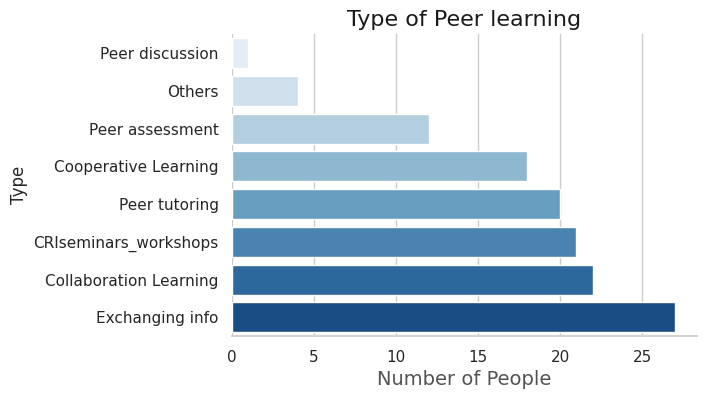

In [122]:
#Stabliching Rules Colors by selecting a pallete ascending
# website with palletes https://matplotlib.org/tutorials/colors/colormaps.html
#order the values 

#bakcground
sns.set(style="whitegrid")
#Better resolution 
plt.rcParams['figure.dpi'] = 100

#plot1
sns.barplot(x="value",y= 'Type', data= pl_total1, ci=None , 
            orient = 'h',palette="Blues", order= pl_total1.sort_values('value').Type )  

#style
plt.xlabel("Number of People", alpha=0.75 , size=14, color= "k" )
plt.title("Type of Peer learning", fontsize = 16, color ="k", )
sns.despine(left=True);
plt.show()


### How is Peer learning is every Educational Program?

In [123]:
#Pivot table. creating the dataframe Peer learning vs Educational programs
df_track_pl = pd.pivot_table(df_main_t, index=['15.track'], values=['Peer assessment', 'CRIseminars_workshops', 
       'Cooperative Learning', 'Others', 'Peer tutoring', 'Peer discussion', 'Collaboration Learning', 'Exchanging info'], aggfunc= np.sum)

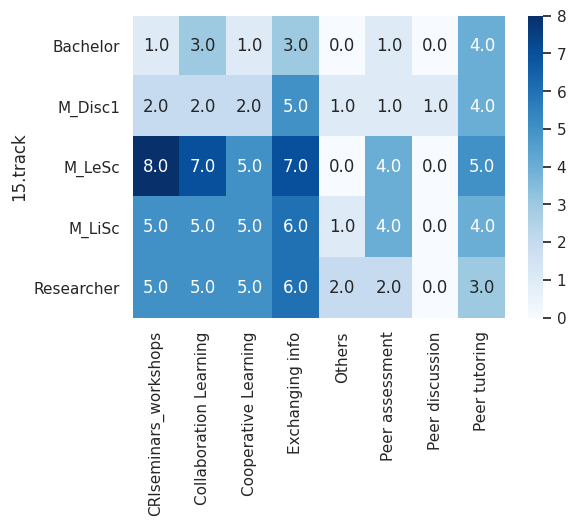

In [124]:
sns.heatmap(df_track_pl, annot=True, fmt=".1f",  cmap = 'Blues')
plt.show()  

Analysis: 
+ Bachelor use less Peer learning tools
+ M_DiSc in exchanging information
+ M_leSc participate more  in CRI workshops, Collaboration Learning and exchanging information
+ M_liSc use more Collaboration Learning and exchanging information
+ Researchers use more exchanging information

### Visualizations of Peer Learning  for each Educational Program 

In [125]:
df_track_pl.columns

Index(['CRIseminars_workshops', 'Collaboration Learning',
       'Cooperative Learning', 'Exchanging info', 'Others', 'Peer assessment',
       'Peer discussion', 'Peer tutoring'],
      dtype='object')

In [126]:
df_track_pl1= df_track_pl.reset_index()

In [127]:
df_track_pl1.columns

Index(['15.track', 'CRIseminars_workshops', 'Collaboration Learning',
       'Cooperative Learning', 'Exchanging info', 'Others', 'Peer assessment',
       'Peer discussion', 'Peer tutoring'],
      dtype='object')

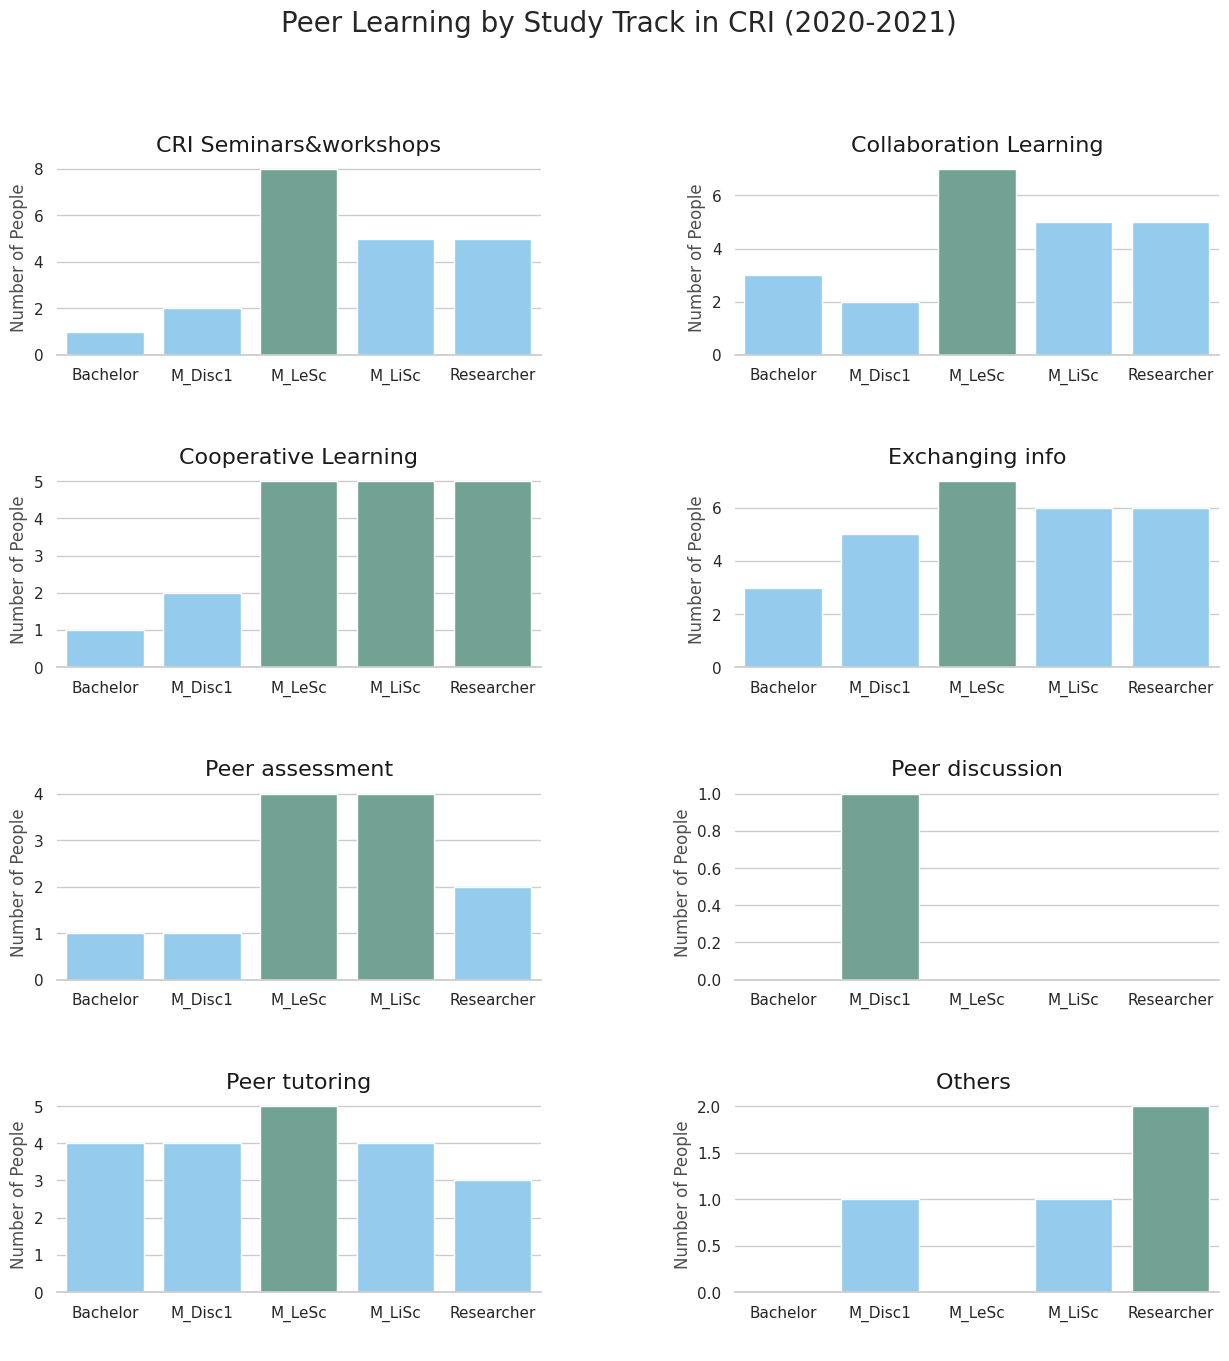

In [128]:
# 8 plots using seaborn and spectral 

sns.set(style="whitegrid")
#sns.set_color_codes("Spectral")

# Increase the sharpness of the display
#plt.rcParams['figure.dpi'] = 360

#configuration of subplots- 4 is the rows, 2 is columns 
fig= plt.figure(3, figsize=(15,15))
the_grid = gridspec.GridSpec(4, 2)

#Give space between the subplots 
fig.subplots_adjust(hspace=0.6, wspace=0.4)

#Stabliching Rules Colors by MaxValue 
def clrs(series, max_color = '#6aaa96', other_color = 'lightskyblue'):
    max_val = series.max()
    pal = []
    
    for item in series:
        if item == max_val:
            pal.append(max_color)
        else:
            pal.append(other_color)
    return pal


#plot1
plt.subplot(the_grid[0, 0])
sns.barplot(x='15.track',y='CRIseminars_workshops', data= df_track_pl1, palette =clrs(df_track_pl1["CRIseminars_workshops"])) 
#style
plt.xlabel("  ", alpha=0.75, size=12, color= "k" )
plt.ylabel('Number of People', size=12, color='#4f4e4e')
plt.title("CRI Seminars&workshops", fontsize = 16, color ="k", )

## plot2
plt.subplot(the_grid[0, 1])
sns.barplot(x='15.track',y='Collaboration Learning' , data= df_track_pl1, palette =clrs(df_track_pl1["Collaboration Learning"]))
#style
plt.xlabel("  ", alpha=0.75, size=18, color= "k" )
plt.ylabel('Number of People', size=12, color='#4f4e4e')
plt.title("Collaboration Learning", fontsize = 16, color ="k", )


## plot3
#asigning the colors function
#clrs = ['red' if (x < max('Cooperative Learning')) else '#003f5c' for x in 'Cooperative Learning' ]

plt.subplot(the_grid[1, 0])
sns.barplot(x='15.track',y="Cooperative Learning", data= df_track_pl1, palette =clrs(df_track_pl1["Cooperative Learning"]))


#style
plt.xlabel("  ", alpha=0.75, size=18, color= "k" )
plt.ylabel('Number of People', size=12, color='#4f4e4e')
plt.title("Cooperative Learning", fontsize = 16, color ="k", )


## plot4
plt.subplot(the_grid[1,1])
sns.barplot(x='15.track',y="Exchanging info", data= df_track_pl1, palette =clrs(df_track_pl1["Exchanging info"]))
#style
plt.xlabel("  ", alpha=0.75, size=18, color= "k" )
plt.ylabel('Number of People', size=12, color='#4f4e4e')
plt.title("Exchanging info", fontsize = 16, color ="k", )


## plot5
plt.subplot(the_grid[2,0])
sns.barplot(x='15.track',y="Peer assessment", data= df_track_pl1, palette =clrs(df_track_pl1["Peer assessment"]))
#style
plt.xlabel("  ", alpha=0.75, size=18, color= "k" )
plt.ylabel('Number of People', size=12, color='#4f4e4e')
plt.title('Peer assessment', fontsize = 16, color ="k", )


## plot6
plt.subplot(the_grid[2,1])
sns.barplot(x='15.track',y='Peer discussion', data= df_track_pl1, palette =clrs(df_track_pl1["Peer discussion"]))
#style
plt.xlabel("  ", alpha=0.75, size=18, color= "k" )
plt.ylabel('Number of People', size=12, color='#4f4e4e')
plt.title('Peer discussion', fontsize = 16, color ="k", )


## plot7
plt.subplot(the_grid[3,0])
sns.barplot(x='15.track',y='Peer tutoring', data= df_track_pl1, palette =clrs(df_track_pl1["Peer tutoring"]))
#style
plt.xlabel("  ", alpha=0.75, size=18, color= "k" )
plt.ylabel('Number of People', size=12, color='#4f4e4e')
plt.title('Peer tutoring', fontsize = 16, color ="k", )


## plot8
plt.subplot(the_grid[3,1])
sns.barplot(x='15.track',y='Others', data= df_track_pl1, palette =clrs(df_track_pl1["Others"]))
#style
plt.xlabel("  ", alpha=0.75, size=18, color= "k" )
plt.ylabel('Number of People', size=12, color='#4f4e4e')
plt.title('Others ', fontsize = 16, color ="k", )


#big title
plt.suptitle('Peer Learning by Study Track in CRI (2020-2021)', fontsize=20, )

#plt.grid(axis='y', alpha=0.75)
sns.despine(left=True);


# Analysis of Online tools 

In [129]:
tools_total = df_main_t[['E-mail', 'Linkedin', 'Rocketchat', 'Twitter',
       'Whatsapp', 'Blog', 'Discord', 'GoogleDocs', 'SMS', 'Slack', 'Wechat', 'Video_Tools']].sum(axis=0)

In [130]:
#give index and convert a serie into dataframe
tools_total.to_frame()
tools_total1= tools_total.reset_index()
tools_total1.columns

Index(['index', 0], dtype='object')

In [131]:
tools_total1.rename(columns = {0: "value",'index': "Type" }, inplace=True)
tools_total1

Type  value
0        E-mail     20
1      Linkedin     13
2    Rocketchat     10
3       Twitter      5
4      Whatsapp     24
5          Blog      1
6       Discord      4
7    GoogleDocs      1
8           SMS      0
9         Slack      2
10       Wechat      1
11  Video_Tools     17

### Online Tools use in Peer Learning

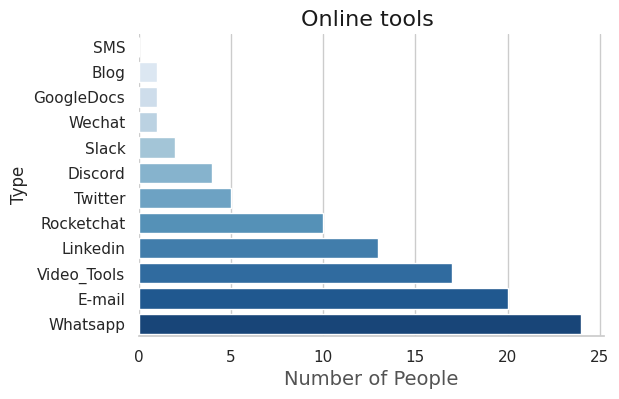

In [132]:
#Stabliching Rules Colors by selecting a pallete ascending
# website with palletes https://matplotlib.org/tutorials/colors/colormaps.html
#order the values 

#Better resolution 
plt.rcParams['figure.dpi'] = 100

#Barplot
sns.barplot(x="value",y= 'Type', data= tools_total1, ci=None , 
            orient = 'h',palette="Blues",
            order=tools_total1.sort_values('value').Type)  

#style
plt.xlabel("Number of People", alpha=0.75 , size=14, color= "k" )
plt.title("Online tools ", fontsize = 16, color ="k", )
sns.despine(left=True);
plt.show()


### What are the online tools use is every Educational Program?

Create a dataframe. Pivot table Tools vs Track 

In [133]:
df_track_tools = pd.pivot_table(df_main_t, index=['15.track'], values=['E-mail', 'Linkedin', 'Rocketchat', 'Twitter',
       'Whatsapp', 'Blog', 'Discord', 'GoogleDocs', 'SMS', 'Slack', 'Wechat', 'Video_Tools'], aggfunc= np.sum)

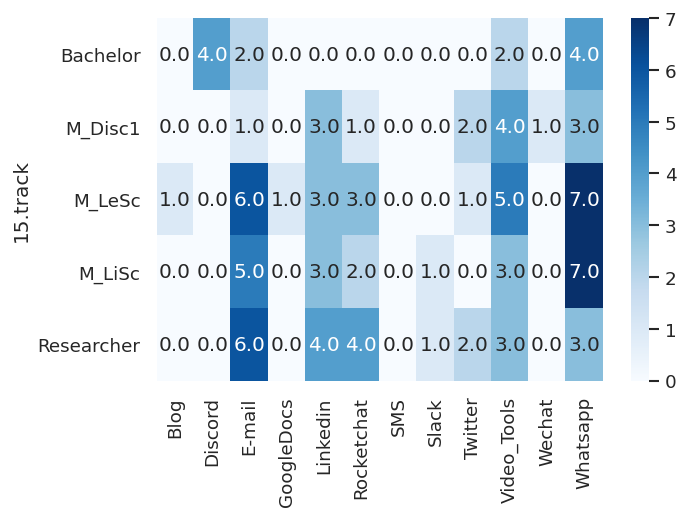

In [135]:
#Better resolution 
plt.rcParams['figure.dpi'] = 120
#Plot
sns.heatmap(df_track_tools, annot=True, fmt=".1f",  cmap = 'Blues')
plt.show() 

### Visualizations of Online Peer Learning in each Educational Program

In [136]:
#Index of df_track_tools 

df_track_tools.columns = [''.join(col) for col in df_track_tools.columns.values]
df_track_tools2  = df_track_tools.reset_index()

df_track_tools2

15.track  Blog  Discord  E-mail  GoogleDocs  Linkedin  Rocketchat  SMS  \
0    Bachelor     0        4       2           0         0           0    0   
1     M_Disc1     0        0       1           0         3           1    0   
2      M_LeSc     1        0       6           1         3           3    0   
3      M_LiSc     0        0       5           0         3           2    0   
4  Researcher     0        0       6           0         4           4    0   

   Slack  Twitter  Video_Tools  Wechat  Whatsapp  
0      0        0            2       0         4  
1      0        2            4       1         3  
2      0        1            5       0         7  
3      1        0            3       0         7  
4      1        2            3       0         3

In [137]:
df_track_tools2.columns

Index(['15.track', 'Blog', 'Discord', 'E-mail', 'GoogleDocs', 'Linkedin',
       'Rocketchat', 'SMS', 'Slack', 'Twitter', 'Video_Tools', 'Wechat',
       'Whatsapp'],
      dtype='object')

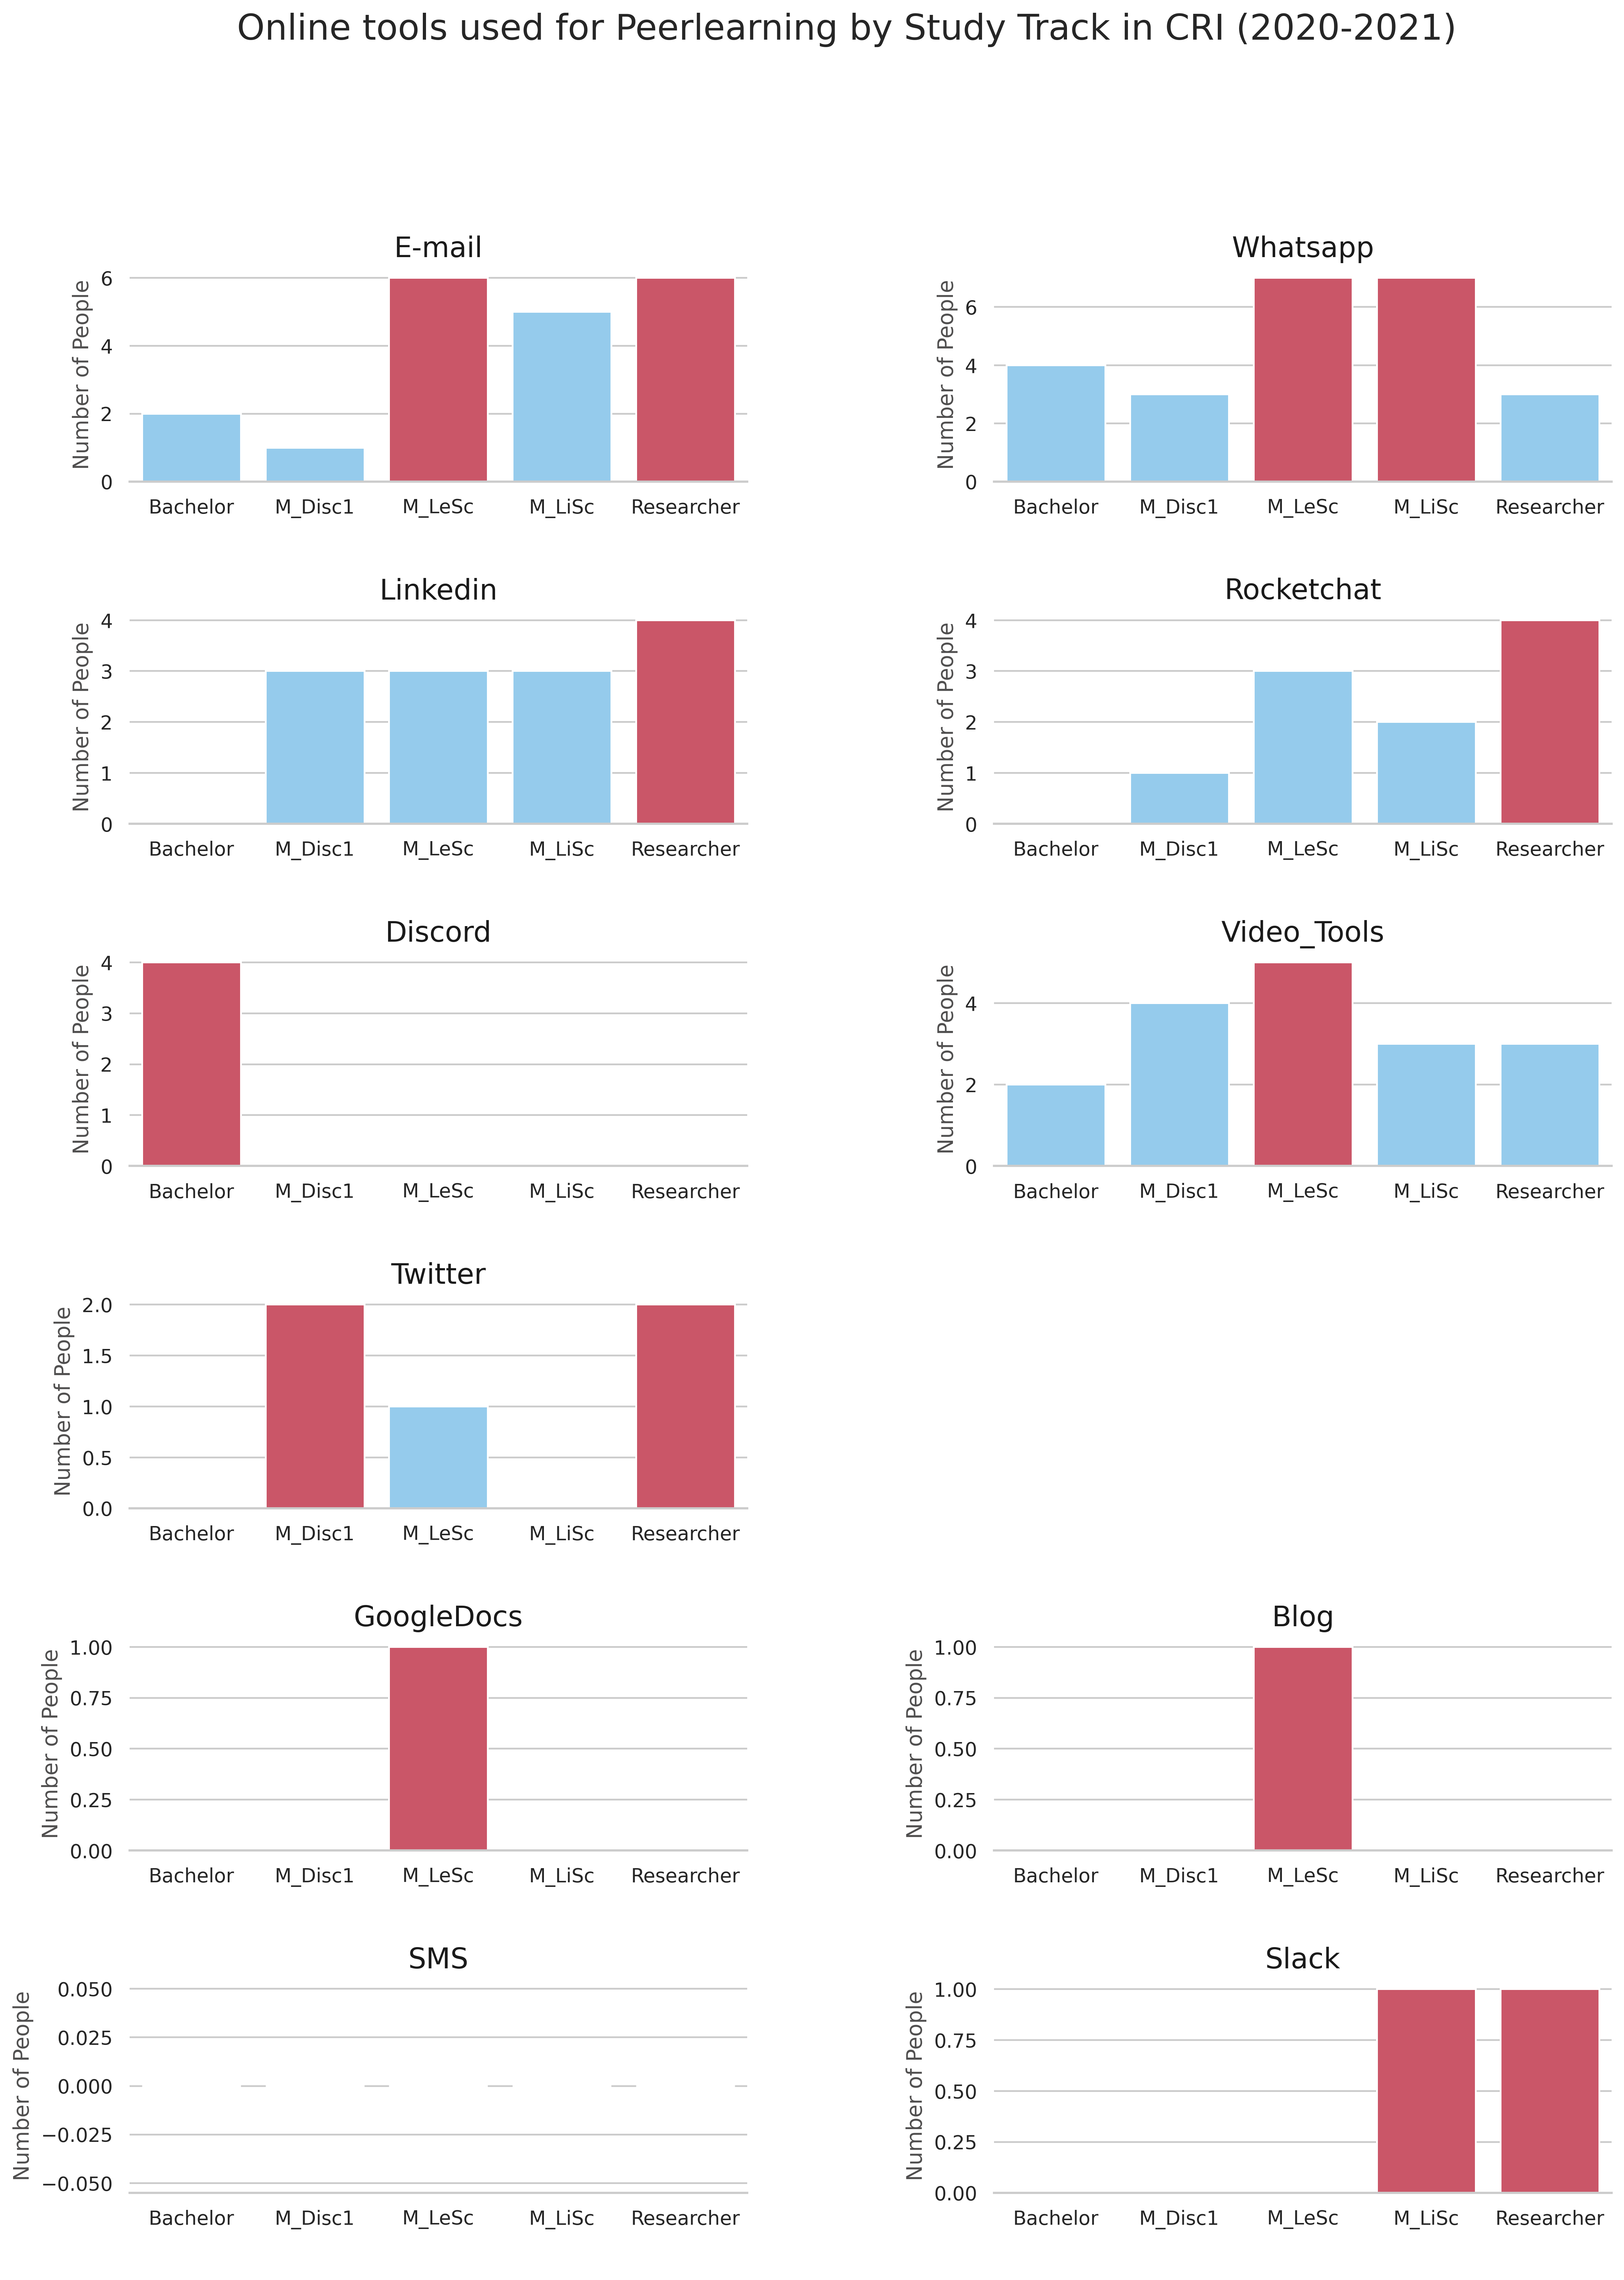

In [139]:
# 8 plots using seaborn and spectral 
#I haven´t plot MatterMost, OtherTools, Wechat 

sns.set(style="whitegrid")
#sns.set_color_codes("Spectral")

# Increase the sharpness of the display
plt.rcParams['figure.dpi'] = 360

#configuration of subplots- 4 is the rows, 4 is columns 
fig= plt.figure(7, figsize=(15,20))
the_grid = gridspec.GridSpec(6, 2)

#Give space between the subplots 
fig.subplots_adjust(hspace=0.6, wspace=0.4)

#Stablishing Rules for Colors by MaxValue 
def clrs(series, max_color = '#de425b', other_color = 'lightskyblue'):
    max_val = series.max()
    pal = []
    
    for item in series:
        if item == max_val:
            pal.append(max_color)
        else:
            pal.append(other_color)
    return pal


#plot1
plt.subplot(the_grid[0, 0])
sns.barplot(x='15.track',y="E-mail", data= df_track_tools2, palette= clrs(df_track_tools2["E-mail"]))
#style
plt.xlabel("  ", alpha=0.75, size=18, color= "k" )
plt.ylabel('Number of People', size=12, color='#4f4e4e')
plt.title("E-mail", fontsize = 16, color ="k", )

## plot2
plt.subplot(the_grid[0, 1])
sns.barplot(x='15.track',y='Whatsapp', data= df_track_tools2, palette= clrs(df_track_tools2["Whatsapp"]))
#style
plt.xlabel("  ", alpha=0.75, size=18, color= "k" )
plt.ylabel('Number of People', size=12, color='#4f4e4e')
plt.title('Whatsapp', fontsize = 16, color ="k", )



## plot3
#asigning the colors function
plt.subplot(the_grid[1,0])
sns.barplot(x='15.track',y="Linkedin", data= df_track_tools2, palette= clrs(df_track_tools2["Linkedin"]))
#style
plt.xlabel("  ", alpha=0.75, size=18, color= "k" )
plt.ylabel('Number of People', size=12, color='#4f4e4e')
plt.title('Linkedin', fontsize = 16, color ="k", )


## plot4
plt.subplot(the_grid[1,1])
sns.barplot(x='15.track',y='Rocketchat', data= df_track_tools2, palette= clrs(df_track_tools2["Rocketchat"]))
#style
plt.xlabel("  ", alpha=0.75, size=18, color= "k" )
plt.ylabel('Number of People', size=12, color='#4f4e4e')
plt.title('Rocketchat', fontsize = 16, color ="k", )


## plot5
plt.subplot(the_grid[2,0])
sns.barplot(x='15.track',y='Discord', data= df_track_tools2, palette= clrs(df_track_tools2["Discord"]))
#style
plt.xlabel("  ", alpha=0.75, size=18, color= "k" )
plt.ylabel('Number of People', size=12, color='#4f4e4e')
plt.title("Discord", fontsize = 16, color ="k", )



## plot6
plt.subplot(the_grid[2,1])
sns.barplot(x='15.track',y='Video_Tools', data= df_track_tools2, palette= clrs(df_track_tools2["Video_Tools"]))
#style
plt.xlabel("  ", alpha=0.75, size=18, color= "k" )
plt.ylabel('Number of People', size=12, color='#4f4e4e')
plt.title('Video_Tools', fontsize = 16, color ="k", )


## plot7
plt.subplot(the_grid[3,0])
sns.barplot(x='15.track',y='Twitter', data= df_track_tools2, palette= clrs(df_track_tools2["Twitter"]))
#style
plt.xlabel("  ", alpha=0.75, size=18, color= "k" )
plt.ylabel('Number of People', size=12, color='#4f4e4e')
plt.title('Twitter', fontsize = 16, color ="k", )


## plot8
plt.subplot(the_grid[4,0])
sns.barplot(x='15.track',y="GoogleDocs", data= df_track_tools2, palette= clrs(df_track_tools2["GoogleDocs"]))
#style
plt.xlabel("  ", alpha=0.75, size=18, color= "k" )
plt.ylabel('Number of People', size=12, color='#4f4e4e')
plt.title("GoogleDocs", fontsize = 16, color ="k", )


## plot9
plt.subplot(the_grid[4,1])
sns.barplot(x='15.track',y='Blog', data= df_track_tools2, palette =clrs(df_track_tools2["Blog"])) 
#style
plt.xlabel("  ", alpha=0.75, size=18, color= "k" )
plt.ylabel('Number of People', size=12, color='#4f4e4e')
plt.title("Blog", fontsize = 16, color ="k", )


## plot10
plt.subplot(the_grid[5,0])
sns.barplot(x='15.track',y='SMS', data= df_track_tools2, palette= clrs(df_track_tools2["SMS"]))
#style
plt.xlabel("  ", alpha=0.75, size=18, color= "k" )
plt.ylabel('Number of People', size=12, color='#4f4e4e')
plt.title('SMS', fontsize = 16, color ="k", )

## plot11
plt.subplot(the_grid[5,1])
sns.barplot(x='15.track',y='Slack', data= df_track_tools2, palette= clrs(df_track_tools2["Slack"]))
#style
plt.xlabel("  ", alpha=0.75, size=18, color= "k" )
plt.ylabel('Number of People', size=12, color='#4f4e4e')
plt.title('Slack', fontsize = 16, color ="k", )


## plot12
#plt.subplot(the_grid[5,0])



#big title
plt.suptitle('Online tools used for Peerlearning by Study Track in CRI (2020-2021)', fontsize=20, )

#plt.grid(axis='y', alpha=0.75)
sns.despine(left=True);

# Analysis of Peers Network 

### Size of Peer Networl Outside of CRI community

In [140]:
#PL_outside

pl_outside = data.groupby(["6.People_outside"])["Timestamp"].count().sort_values(ascending=False).to_frame()
pl_outside = pl_outside.rename(columns={"6.People_outside":"People OutsideCRI",'Timestamp':'Number of People'}).reset_index()
pl_outside["Percentages"] = pl_outside["Number of People"]/sum(pl_outside["Number of People"])*100
pl_outside["Percentages"].round(decimals=0)
pl_outside["Percentages"].sort_values(ascending=False)
pl_outside

6.People_outside  Number of People  Percentages
0              2-5                17    48.571429
1     More than 11                 9    25.714286
2                0                 6    17.142857
3             5-10                 2     5.714286
4                1                 1     2.857143

In [141]:
data.columns

Index(['Unnamed: 0', 'Timestamp', '1.connecting_PL', '2.Why?', '3.PL_driven',
       '4.Online_tools', '4.1.others_tools', '5.why_use_PL_online',
       '5.1.Others_reason_PL_online', '6.People_outside', '6.1.People_CRI',
       '7.names', '8.importancePL', '9.qualityPL', '10.use_socialmedia',
       '11.why_use_socialmedia', '12.difficulties_PL', '13.willdo_PL',
       '14.PL_driven2', '15.track', '16.gender', '17.age', '18.info_add',
       '19.email', 'AgeGroup'],
      dtype='object')

In [142]:
#Creating the dataframe
track_pl = data.groupby(['15.track',"6.1.People_CRI"])["17.age"].count().to_frame().reset_index()
track_pl.rename(columns = {'15.track':'CRI Track','6.1.People_CRI':'Range', '17.age' : 'Number of People'}, inplace = True)
track_pl.sort_values(by='Range',ascending=False)

CRI Track         Range  Number of People
8   Master AIRE - LeSc  More than 11                 2
4   Master AIRE - DiSc  More than 11                 1
12  Master AIRE - LiSc  More than 11                 1
1       Bachelor - FDV  More than 11                 2
16          Researcher  More than 11                 3
7   Master AIRE - LeSc          5-10                 3
3   Master AIRE - DiSc          5-10                 1
11  Master AIRE - LiSc          5-10                 1
15          Researcher          5-10                 3
0       Bachelor - FDV          5-10                 2
6   Master AIRE - LeSc           2-5                 3
10  Master AIRE - LiSc           2-5                 3
2   Master AIRE - DiSc           2-5                 3
14          Researcher           2-5                 1
13                 PhD             1                 1
5   Master AIRE - LeSc             0                 1
9   Master AIRE - LiSc             0                 2

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


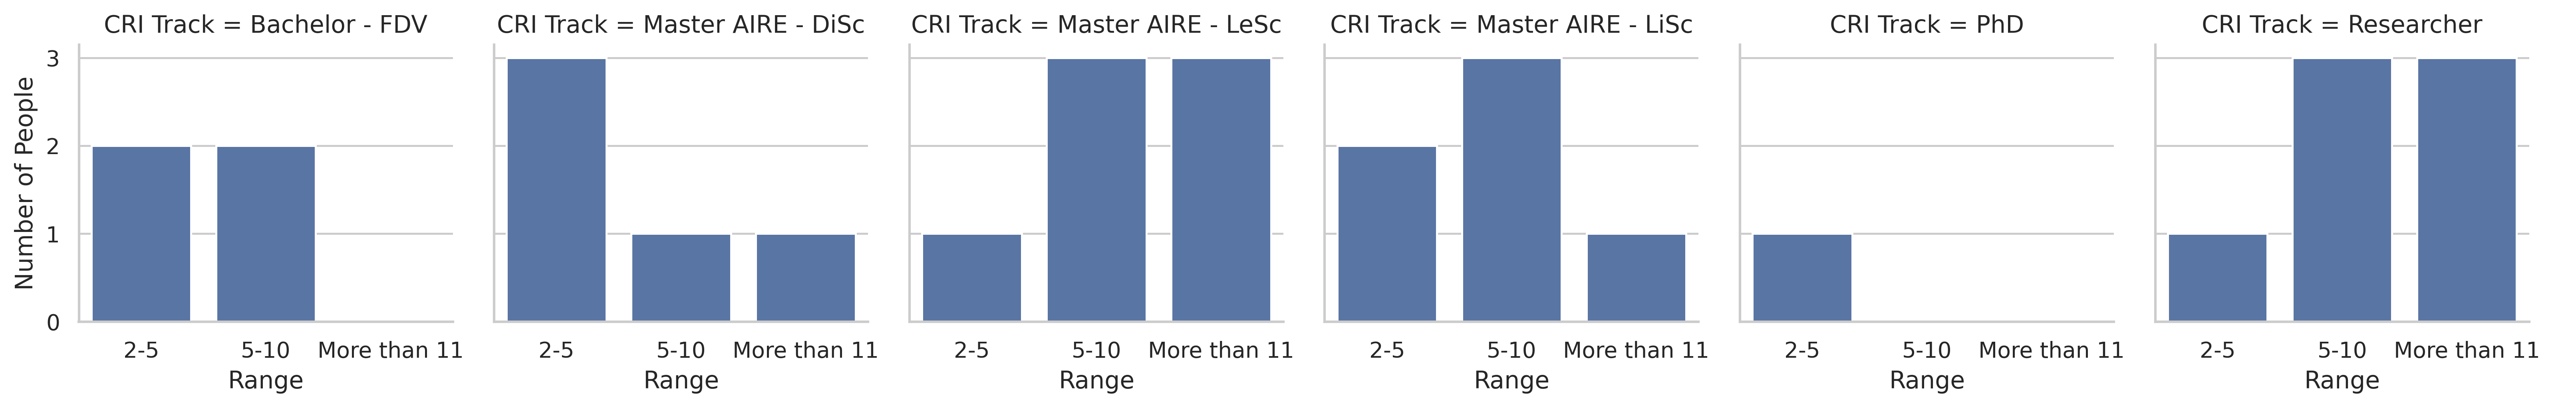

In [143]:
g = sns.FacetGrid(track_pl, col="CRI Track", )
g.map(sns.barplot, "Range", "Number of People")
g.add_legend()


plt.show()

# Correlation between all the Categorical Variables  - Theil`s U

Theil’s U, also referred to as the Uncertainty Coefficient, is based on the conditional entropy between x and y — or in human language, given the value of x, how many possible states does y have, and how often do they occur. Just like Cramer’s V, the output value is on the range of [0,1], with the same interpretations as before — but unlike Cramer’s V, it is asymmetric, meaning U(x,y)≠U(y,x) (while V(x,y)=V(y,x), where V is Cramer’s V). Using Theil’s U in the simple case above will let us find out that knowing y means we know x, but not vice-versa.

In [197]:
# importing the libraries (see them in the beginning of this notebook)


In [145]:
#bring the dataframe for analysis. Total data withhout Opening Questions 
df_main_t.columns

Index(['Unnamed: 0', 'Timestamp', '1.connecting_PL', '3.PL_driven',
       '6.People_outside', '6.1.People_CRI', '8.importancePL', '9.qualityPL',
       '10.use_socialmedia', '14.PL_driven2', '15.track', '16.gender',
       '17.age', 'AgeGroup', 'E-mail', 'Linkedin', 'Rocketchat', 'Twitter',
       'Whatsapp', 'OtherTool', 'Blog', 'Discord', 'GoogleDocs', 'Mattermost',
       'SMS', 'Slack', 'Wechat', 'Video_Tools', 'Ask questions to other peers',
       'Peer assessment', 'CRIseminars_workshops', 'Cooperative Learning',
       'Others', 'Peer tutoring', 'Peer discussion', 'Collaboration Learning',
       'Exchanging info'],
      dtype='object')

In [146]:
df_main_c = df_main_t.copy()

In [148]:
#consulting the number of null values in each variable
print(pd.isnull(df_main_c).sum())

Unnamed: 0                      0
Timestamp                       0
1.connecting_PL                 0
3.PL_driven                     0
6.People_outside                0
6.1.People_CRI                  2
8.importancePL                  0
9.qualityPL                     0
10.use_socialmedia              0
14.PL_driven2                   0
15.track                        0
16.gender                       0
17.age                          0
AgeGroup                        0
E-mail                          0
Linkedin                        0
Rocketchat                      0
Twitter                         0
Whatsapp                        0
OtherTool                       0
Blog                            0
Discord                         0
GoogleDocs                      0
Mattermost                      0
SMS                             0
Slack                           0
Wechat                          0
Video_Tools                     0
Ask questions to other peers    0
Peer assessmen

### Preparing the data
Missing values in the category of Peer Connections is replace by the value most frequency (2-5)

In [149]:
df_main_c["6.1.People_CRI"]= df_main_c["6.1.People_CRI"].replace(np.nan,"2-5")

In [150]:
df_main_c["6.1.People_CRI"].value_counts()

2-5             12
5-10            10
More than 11     9
0                3
Name: 6.1.People_CRI, dtype: int64

### Cleaning- Drop columns

In [151]:
#creating a df for the correlation
df_corr = df_main_c.copy()

In [152]:
df_corr.columns

Index(['Unnamed: 0', 'Timestamp', '1.connecting_PL', '3.PL_driven',
       '6.People_outside', '6.1.People_CRI', '8.importancePL', '9.qualityPL',
       '10.use_socialmedia', '14.PL_driven2', '15.track', '16.gender',
       '17.age', 'AgeGroup', 'E-mail', 'Linkedin', 'Rocketchat', 'Twitter',
       'Whatsapp', 'OtherTool', 'Blog', 'Discord', 'GoogleDocs', 'Mattermost',
       'SMS', 'Slack', 'Wechat', 'Video_Tools', 'Ask questions to other peers',
       'Peer assessment', 'CRIseminars_workshops', 'Cooperative Learning',
       'Others', 'Peer tutoring', 'Peer discussion', 'Collaboration Learning',
       'Exchanging info'],
      dtype='object')

In [153]:
df_corr = df_corr.drop(['3.PL_driven', 'Unnamed: 0'], axis=1)


In [154]:
df_corr = df_corr.drop(['17.age', 'OtherTool','Mattermost', 'SMS', 'Wechat'], axis=1)

In [155]:
df_corr.columns

Index(['Timestamp', '1.connecting_PL', '6.People_outside', '6.1.People_CRI',
       '8.importancePL', '9.qualityPL', '10.use_socialmedia', '14.PL_driven2',
       '15.track', '16.gender', 'AgeGroup', 'E-mail', 'Linkedin', 'Rocketchat',
       'Twitter', 'Whatsapp', 'Blog', 'Discord', 'GoogleDocs', 'Slack',
       'Video_Tools', 'Ask questions to other peers', 'Peer assessment',
       'CRIseminars_workshops', 'Cooperative Learning', 'Others',
       'Peer tutoring', 'Peer discussion', 'Collaboration Learning',
       'Exchanging info'],
      dtype='object')

In [156]:
df_corr['16.gender'] .unique()

array(['Female', 'Male', 'Prefer not to say'], dtype=object)

In [157]:
df_corr['16.gender'] = df_corr['16.gender'].replace({'Prefer not to say': "Not mention"})

In [158]:
df_corr['16.gender'] .unique()

array(['Female', 'Male', 'Not mention'], dtype=object)

In [159]:
df_corr1 = df_corr.copy()

In [160]:
df_corr = df_corr.drop(['Timestamp'], axis=1)

In [161]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 34
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   1.connecting_PL               34 non-null     object  
 1   6.People_outside              34 non-null     object  
 2   6.1.People_CRI                34 non-null     object  
 3   8.importancePL                34 non-null     int64   
 4   9.qualityPL                   34 non-null     int64   
 5   10.use_socialmedia            34 non-null     object  
 6   14.PL_driven2                 34 non-null     object  
 7   15.track                      34 non-null     object  
 8   16.gender                     34 non-null     object  
 9   AgeGroup                      34 non-null     category
 10  E-mail                        34 non-null     int64   
 11  Linkedin                      34 non-null     int64   
 12  Rocketchat                    34 non-null     int64 

In [164]:
# Printing all the category values inside of each column

for feature in df_corr.columns:
    uniq = np.unique(df_corr[feature])
    print('{}: {} distinct values -  {}'.format(feature,len(uniq),uniq))

1.connecting_PL: 2 distinct values -  ['No' 'Yes']
6.People_outside: 5 distinct values -  ['0' '1' '2-5' '5-10' 'More than 11']
6.1.People_CRI: 4 distinct values -  ['0' '2-5' '5-10' 'More than 11']
8.importancePL: 4 distinct values -  [2 3 4 5]
9.qualityPL: 4 distinct values -  [2 3 4 5]
10.use_socialmedia: 2 distinct values -  ['No' 'Yes']
14.PL_driven2: 4 distinct values -  ['Both' 'Peer learning driven by teachers' 'Self-driven' 'Teachers']
15.track: 5 distinct values -  ['Bachelor' 'M_Disc1' 'M_LeSc' 'M_LiSc' 'Researcher']
16.gender: 3 distinct values -  ['Female' 'Male' 'Not mention']
AgeGroup: 4 distinct values -  ['18-25' '26-35' '36-45' '46-55']
E-mail: 2 distinct values -  [0 1]
Linkedin: 2 distinct values -  [0 1]
Rocketchat: 2 distinct values -  [0 1]
Twitter: 2 distinct values -  [0 1]
Whatsapp: 2 distinct values -  [0 1]
Blog: 2 distinct values -  [0 1]
Discord: 2 distinct values -  [0 1]
GoogleDocs: 2 distinct values -  [0 1]
Slack: 2 distinct values -  [0 1]
Video_Tools

### Theil's U correlation

Time to start diving deeper into the data!

we will use Theil's U, also known as the Uncertainty Coefficient. 

### Documentation
https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

https://www.kaggle.com/akshay22071995/alone-in-the-woods-using-theil-s-u-for-survival



- Calculates Theil's U statistic (Uncertainty coefficient) for categorical- categorical association. 

This is the uncertainty of x given y: value is on the range of [0,1] - where 0 means
and  provides no information about x, and 1 means y provides full information about x.

This is an asymmetric coefficient: U(x,y) != U(y,x)

Wikipedia: https://en.wikipedia.org/wiki/Uncertainty_coefficient


- Calculates the conditional entropy of x given y: S(x|y)

    Wikipedia: https://en.wikipedia.org/wiki/Conditional_entropy
    Parameters:
    -----------
    x : list / NumPy ndarray / Pandas Series
        A sequence of measurements

    y : list / NumPy ndarray / Pandas Series
        A sequence of measurements

    nan_strategy : string, default = 'replace'
        How to handle missing values: can be either 'drop' to remove samples
        with missing values, or 'replace' to replace all missing values with
        the nan_replace_value. Missing values are None and np.nan.

    nan_replace_value : any, default = 0.0
        The value used to replace missing values with. Only applicable when
        nan_strategy is set to 'replace'.
        
    log_base: float, default = e
        specifying base for calculating entropy. Default is base e.

Notebook
https://github.com/shakedzy/dython/blob/master/dython/nominal.py


In [165]:
def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x



#### Correlation for one variable(Gender). dataframe : df_corr

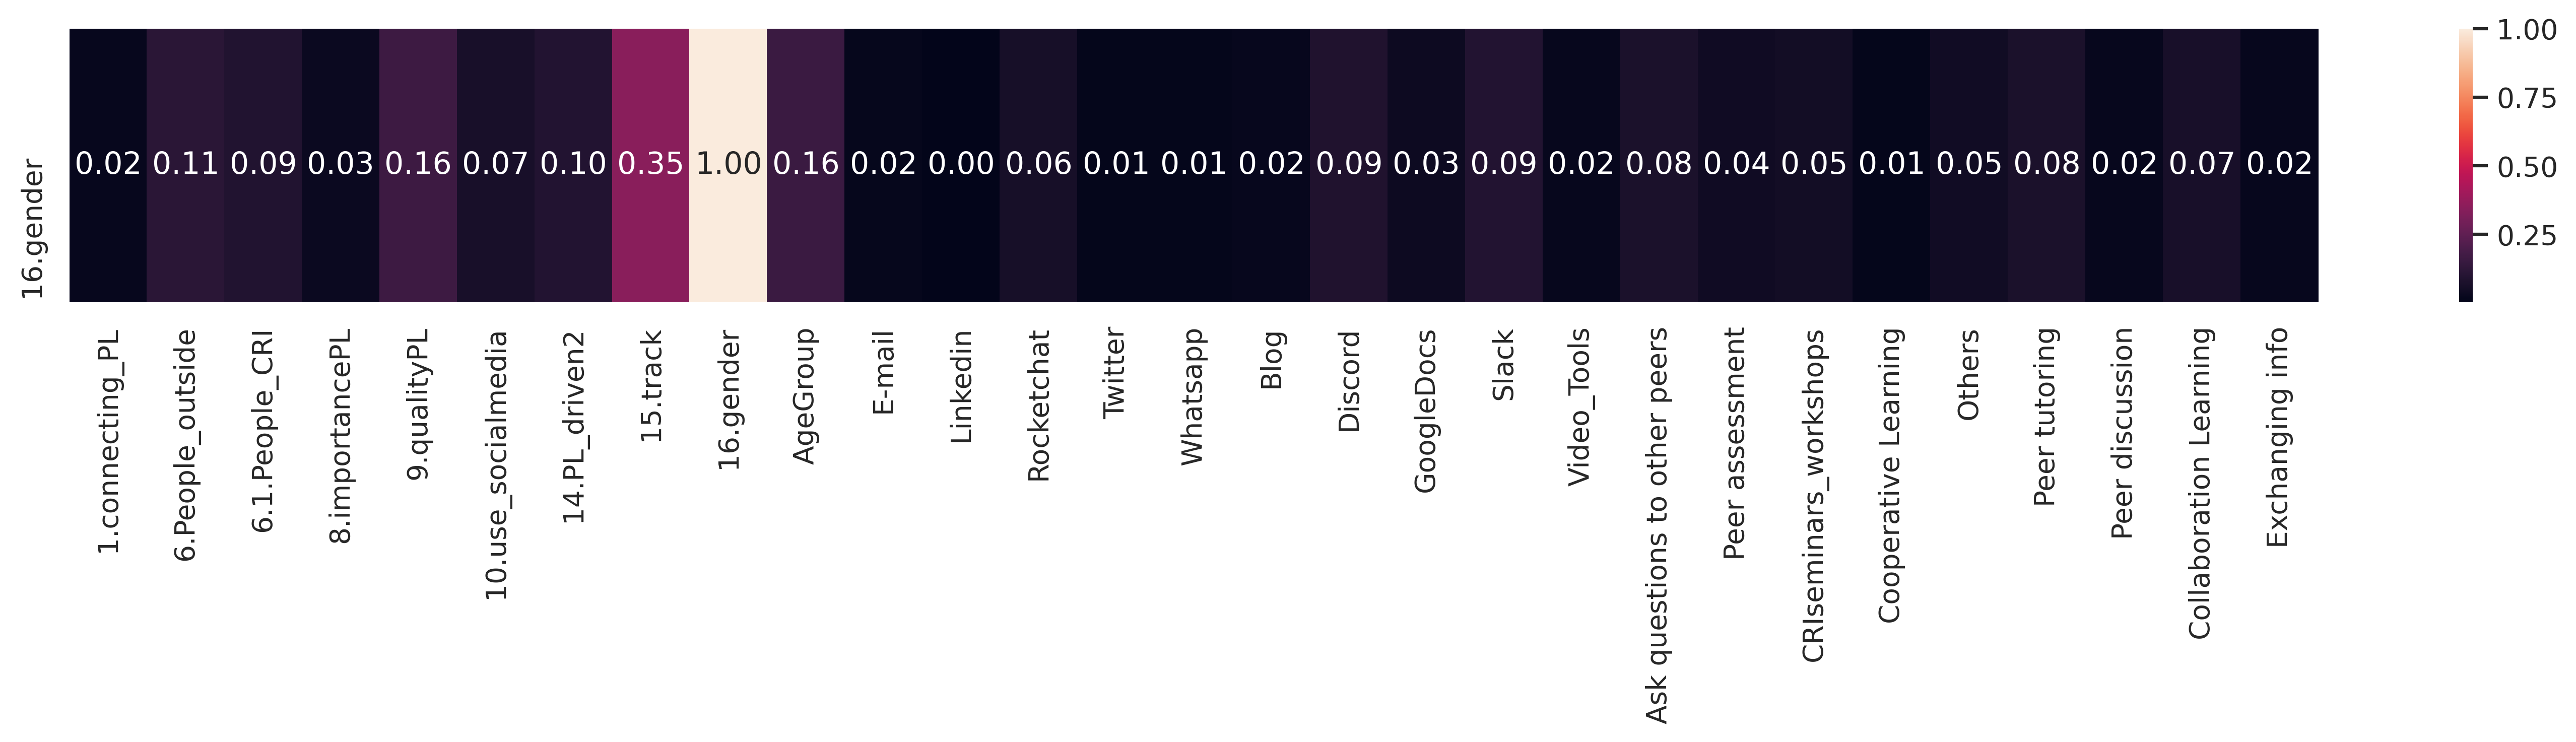

In [166]:
#correlation for onew single variable
corr_theilu = pd.DataFrame( index=['16.gender'] ,columns= df_corr.columns)

columns = df_corr .columns

for j in range(0,len(columns)):
    u = theil_u(df_corr ['16.gender'].tolist(),df_corr [columns[j]].tolist())
    corr_theilu.loc[:,columns[j]] = u
corr_theilu.fillna(value=np.nan,inplace=True)

#Plot heatmap
plt.figure(figsize=(20,2))
sns.heatmap(corr_theilu,annot=True,fmt='.2f')
plt.show()



In [167]:
df_corr.columns

Index(['1.connecting_PL', '6.People_outside', '6.1.People_CRI',
       '8.importancePL', '9.qualityPL', '10.use_socialmedia', '14.PL_driven2',
       '15.track', '16.gender', 'AgeGroup', 'E-mail', 'Linkedin', 'Rocketchat',
       'Twitter', 'Whatsapp', 'Blog', 'Discord', 'GoogleDocs', 'Slack',
       'Video_Tools', 'Ask questions to other peers', 'Peer assessment',
       'CRIseminars_workshops', 'Cooperative Learning', 'Others',
       'Peer tutoring', 'Peer discussion', 'Collaboration Learning',
       'Exchanging info'],
      dtype='object')

### Correlation between all categorical variables

In [168]:
dataset = df_corr.copy()

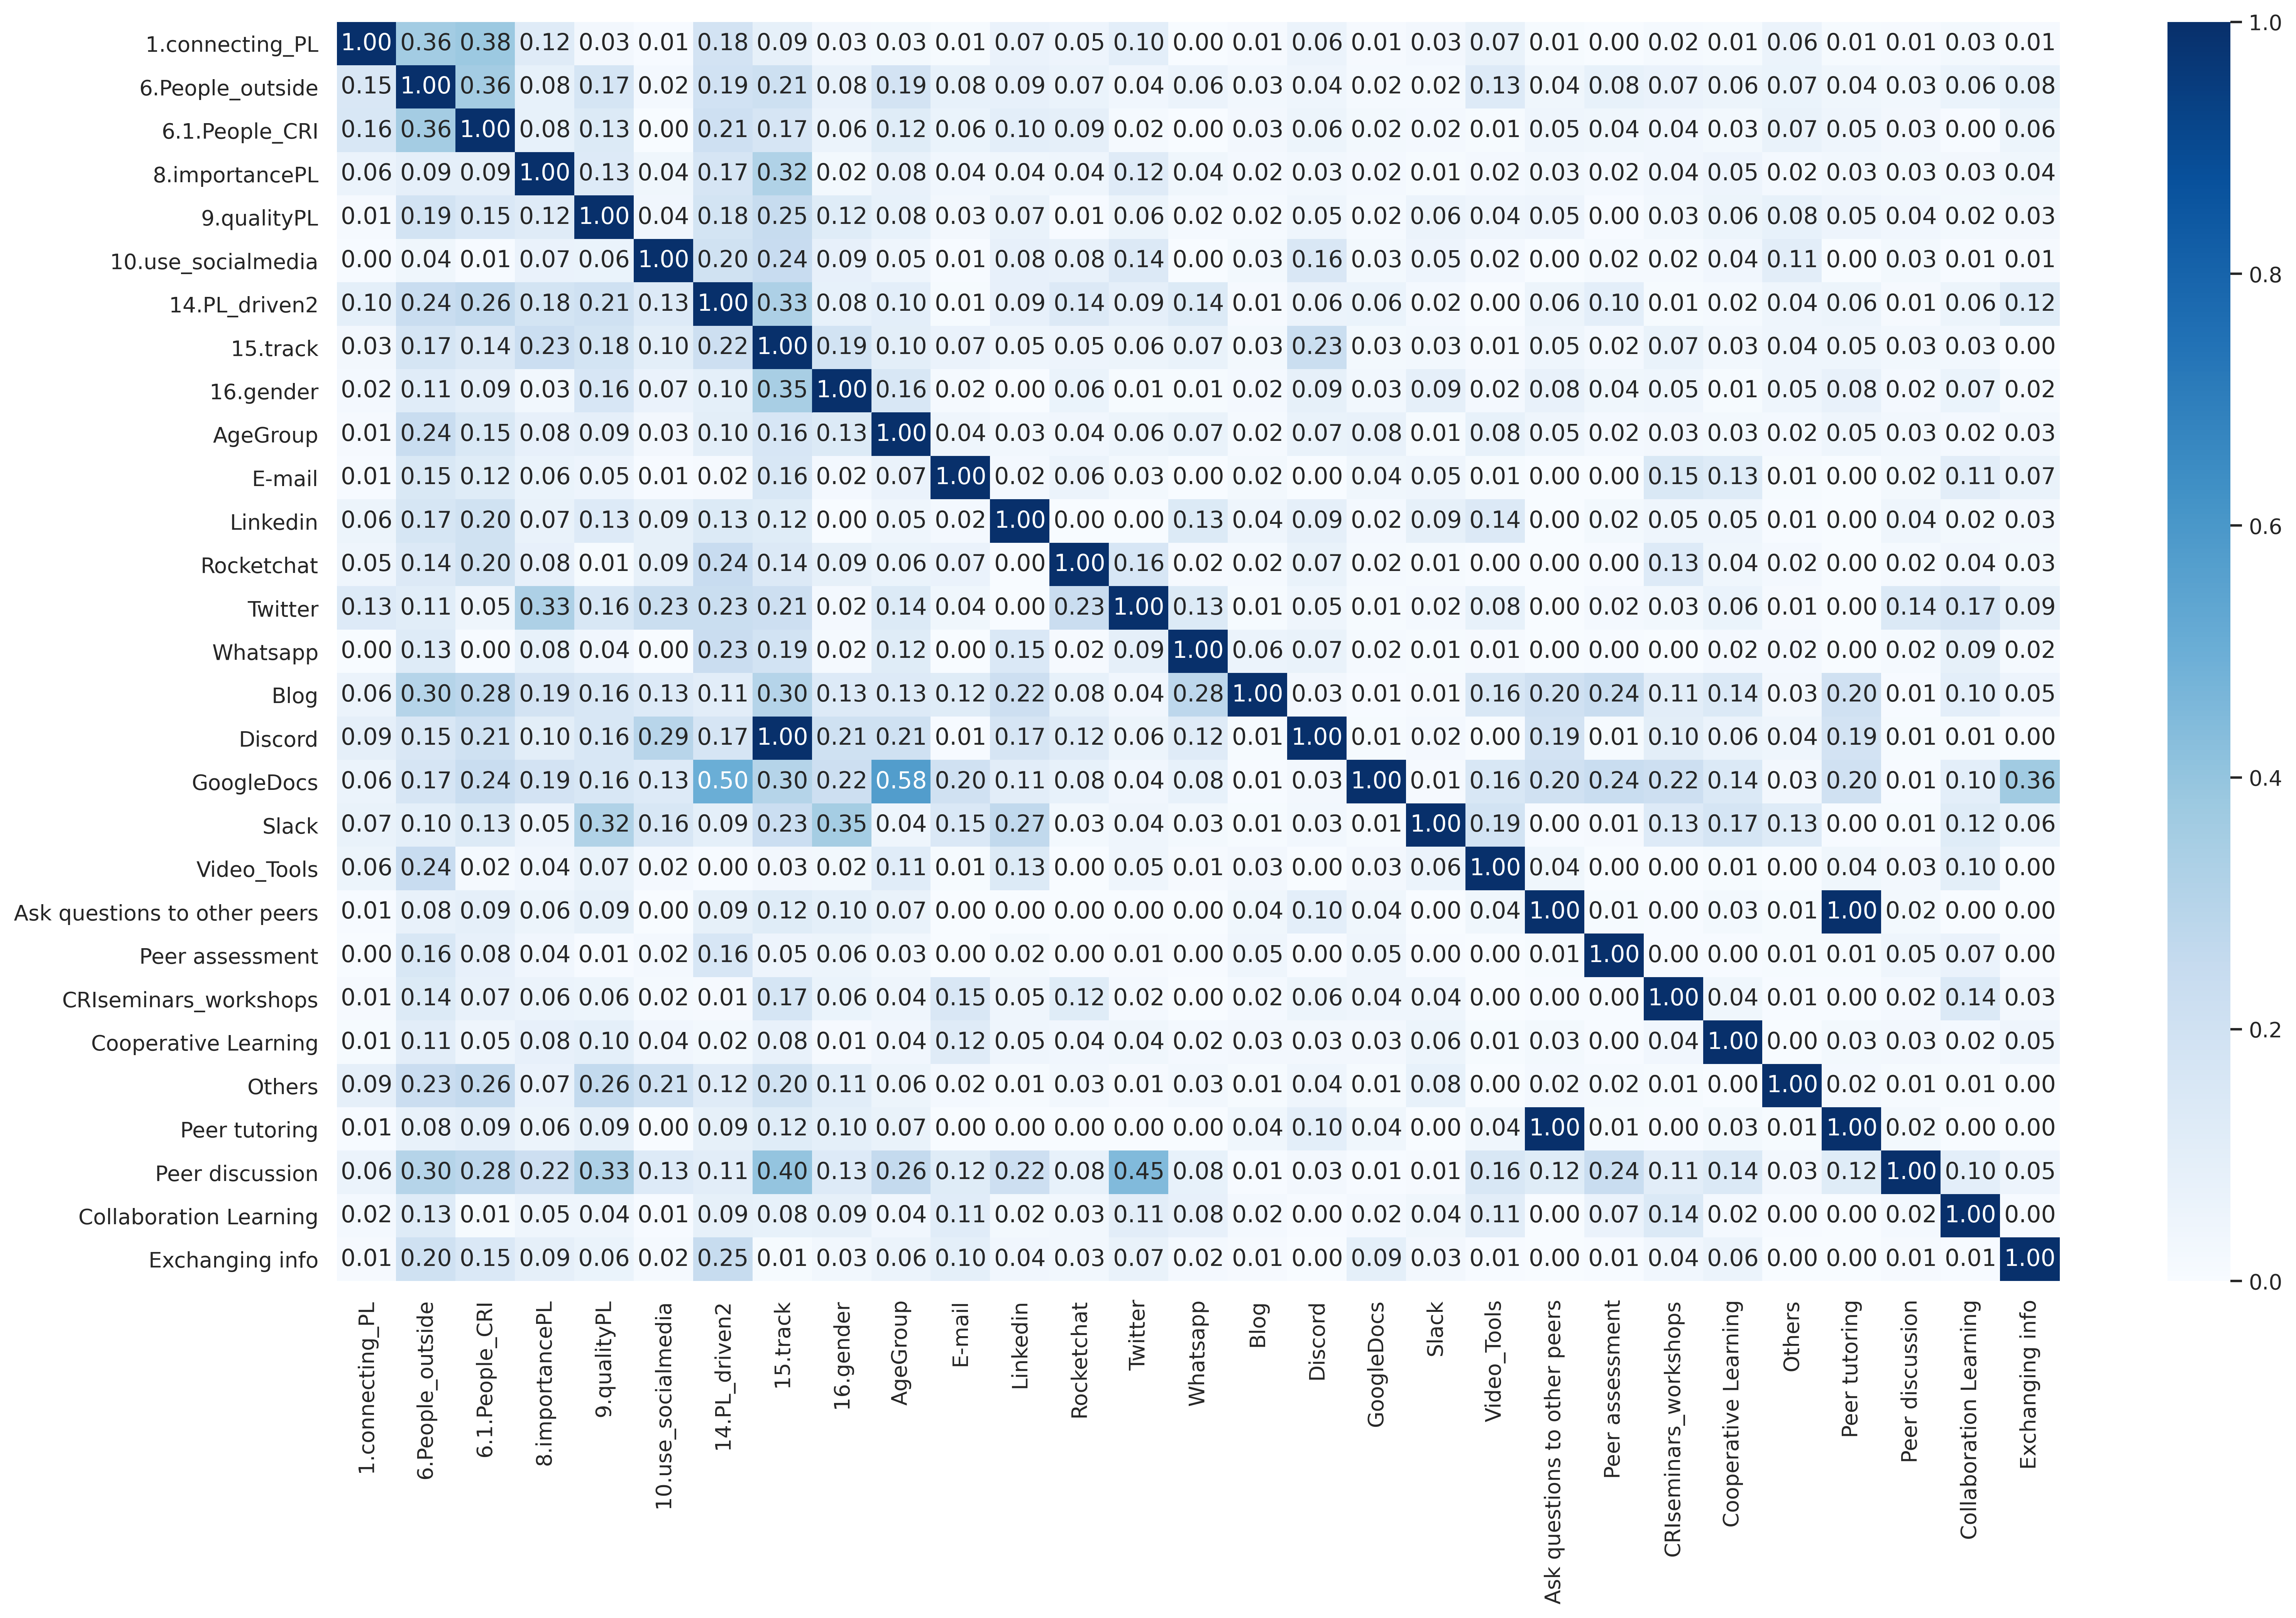

In [173]:
#dataset = convert(dataset, 'dataframe')

corr = pd.DataFrame(index=columns, columns= dataset.columns)


for i in range(0,len(columns)):
    for j in range(i,len(columns)):
        if i == j:
            corr[columns[i]][columns[j]] = 1.0
        else:
            if theil_u:
                corr[columns[j]][columns[i]] = theil_u(dataset[columns[i]],dataset[columns[j]])
                corr[columns[i]][columns[j]] = theil_u(dataset[columns[j]],dataset[columns[i]])

corr.fillna(value=np.nan, inplace=True)

#Plot heatmap
plt.figure(figsize=(20,12))
sns.heatmap(corr,annot=True,fmt='.2f', cmap = 'Blues')
plt.show()

https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

# Correlation Ratio - mix of variables categorical - non categorical


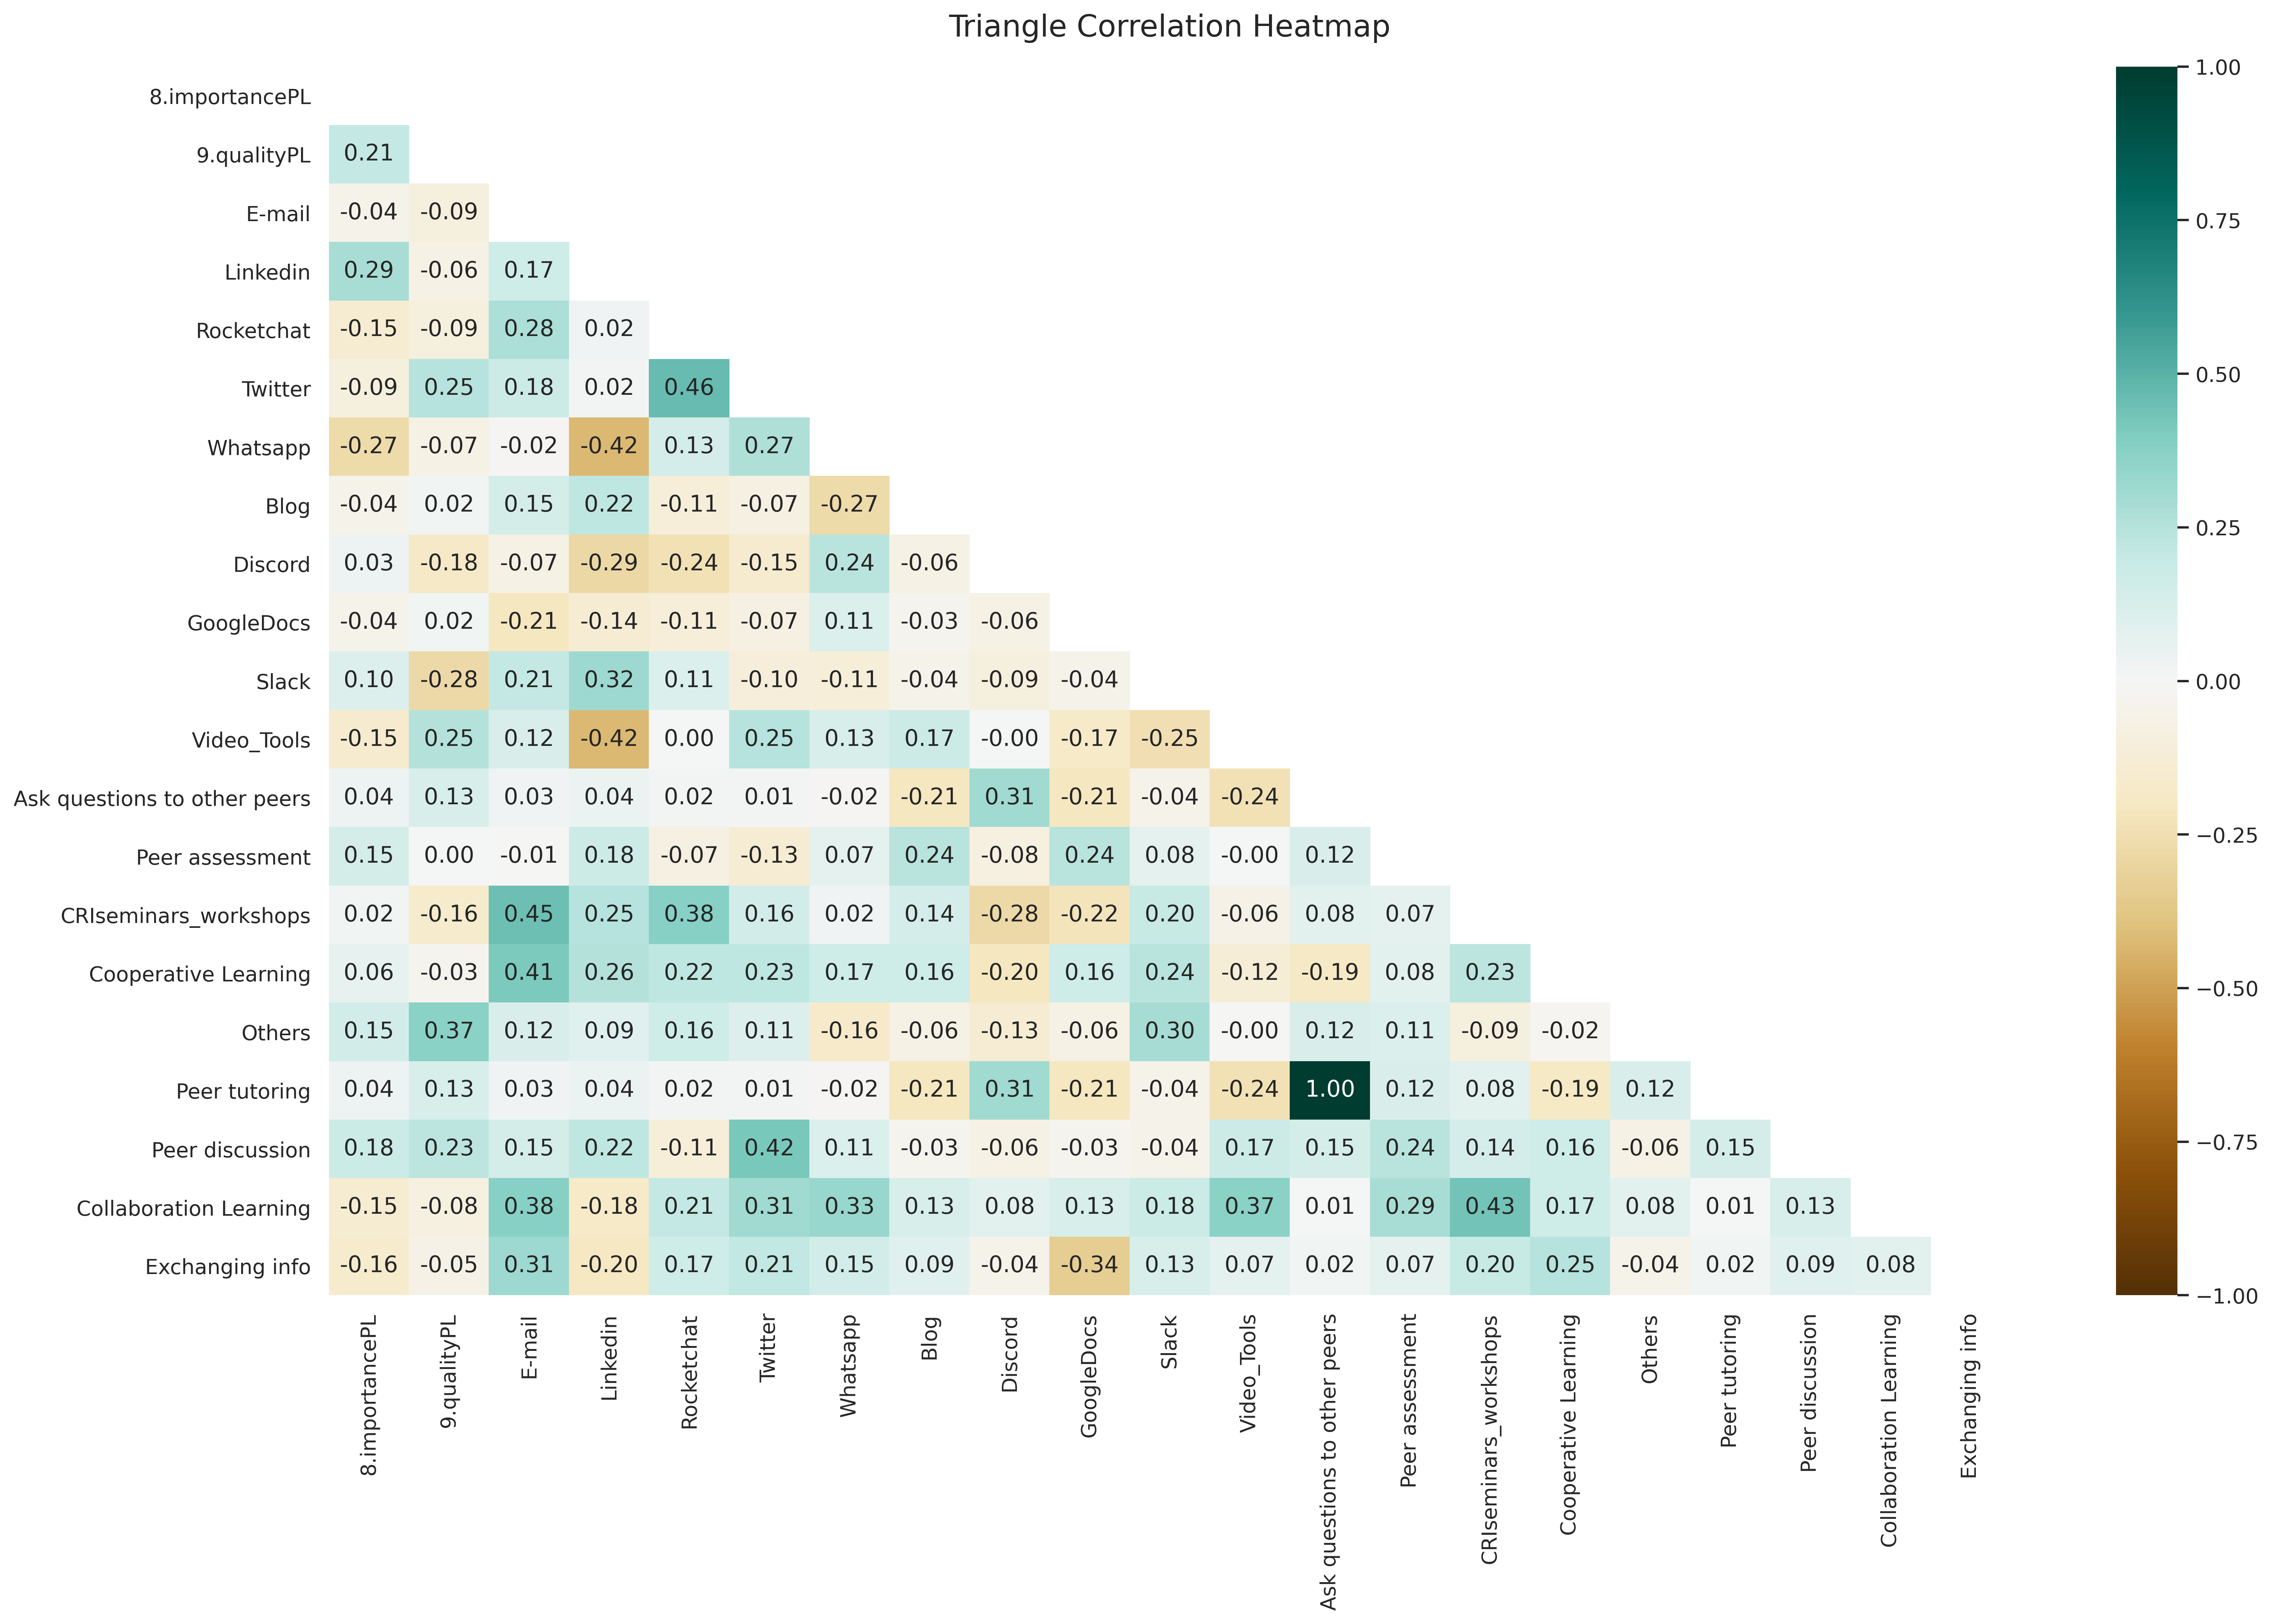

In [175]:
 mask = np.triu(np.ones_like(dataset.corr(), dtype=bool))
 plt.figure(figsize=(20,12))
 heatmap = sns.heatmap(dataset.corr(), mask=mask,fmt=".2f", vmin=-1, vmax=1, annot=True, cmap='BrBG')

 heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':16}, pad=16);


# Analysis Gender vs tools and Type Learning 

In [ ]:
import seaborn as sns

In [176]:
#bring the dataframe for analysis. Total data withhout Opening Questions 
df_corr.columns

Index(['1.connecting_PL', '6.People_outside', '6.1.People_CRI',
       '8.importancePL', '9.qualityPL', '10.use_socialmedia', '14.PL_driven2',
       '15.track', '16.gender', 'AgeGroup', 'E-mail', 'Linkedin', 'Rocketchat',
       'Twitter', 'Whatsapp', 'Blog', 'Discord', 'GoogleDocs', 'Slack',
       'Video_Tools', 'Ask questions to other peers', 'Peer assessment',
       'CRIseminars_workshops', 'Cooperative Learning', 'Others',
       'Peer tutoring', 'Peer discussion', 'Collaboration Learning',
       'Exchanging info'],
      dtype='object')

In [177]:
gender = df_corr.copy()

### Visualization Gender and Online Tools

In [179]:
#creating the dataframe
gender_tools = gender.groupby(gender['16.gender'])[['E-mail', 'Linkedin', 'Rocketchat', 'Twitter',
       'Whatsapp', 'Blog', 'Discord', 'GoogleDocs', 'Slack', 'Video_Tools']]. sum()

In [180]:
gender_tools 

E-mail  Linkedin  Rocketchat  Twitter  Whatsapp  Blog  Discord  \
16.gender                                                                     
Female           10         7           4        3        13     1        4   
Male              9         5           6        2        10     0        0   
Not mention       1         1           0        0         1     0        0   

             GoogleDocs  Slack  Video_Tools  
16.gender                                    
Female                0      0           11  
Male                  1      1            5  
Not mention           0      1            1

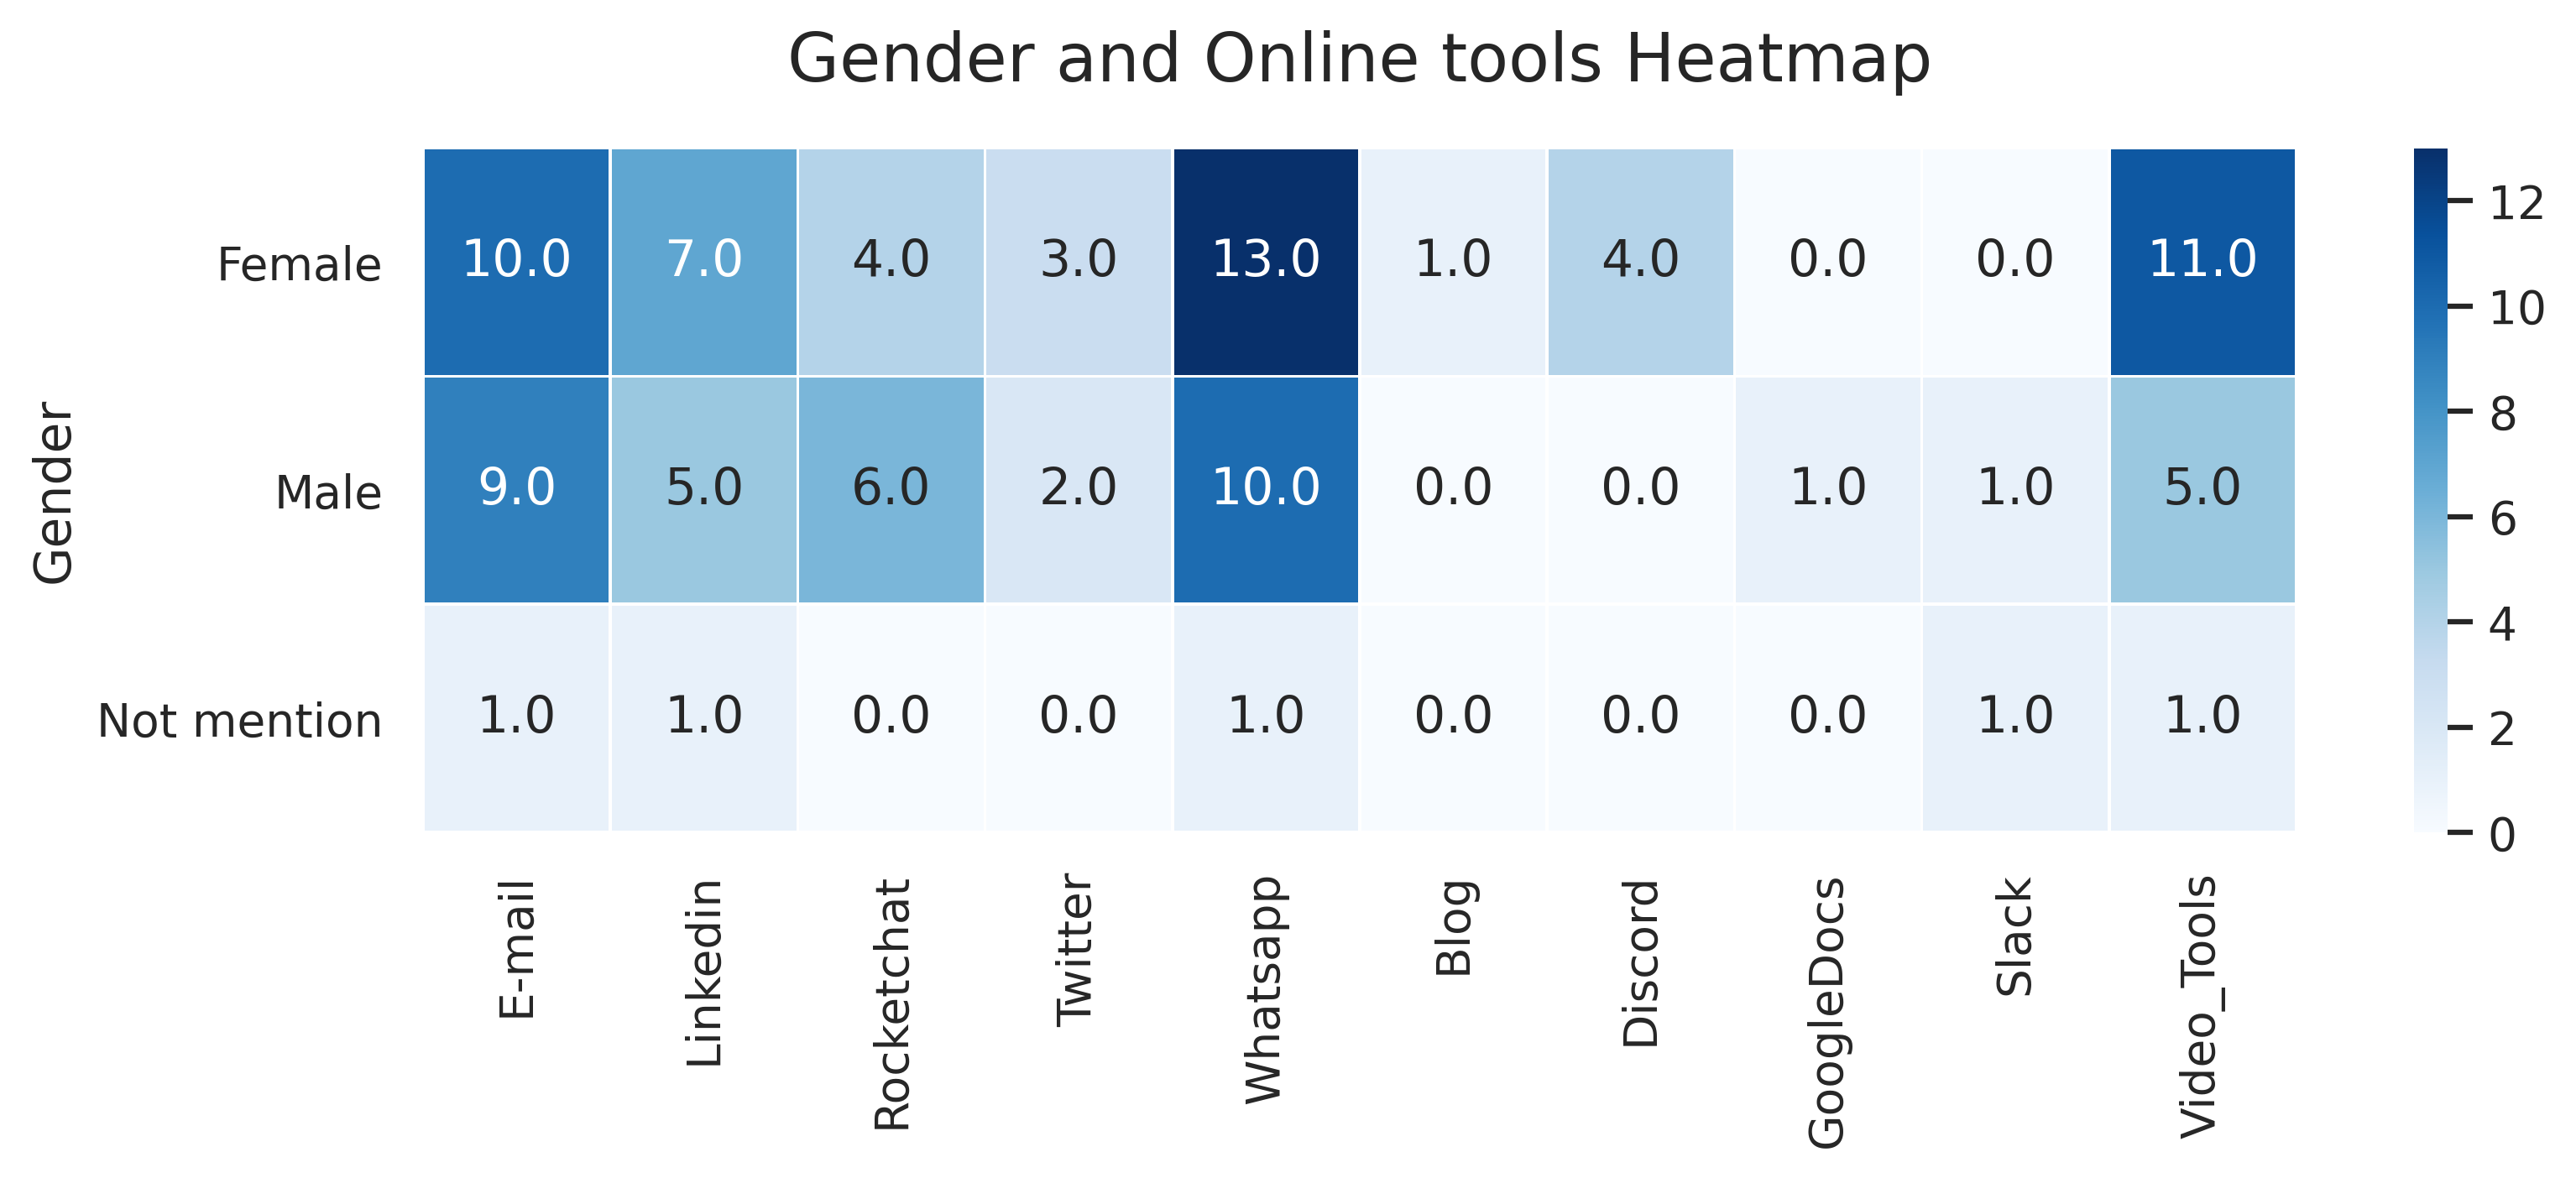

In [186]:
plt.figure(figsize=(10,3))

#plot
x=sns.heatmap(gender_tools, annot=True,linewidths=0.5, fmt=".1F",  cmap = 'Blues', annot_kws={"size": 12})
plt.ylabel('Gender')
plt.yticks(rotation='horizontal')
x.set_title('Gender and Online tools Heatmap', fontdict={'fontsize':16}, pad=16)
plt.show() 

### Visualization Gender and Peer Learning

In [189]:
#creating the dataframe
gender_PL = gender.groupby(gender['16.gender'])[['Ask questions to other peers', 'Peer assessment',
       'CRIseminars_workshops', 'Cooperative Learning', 'Others','Peer tutoring', 'Peer discussion', 'Collaboration Learning',
       'Exchanging info']]. sum()

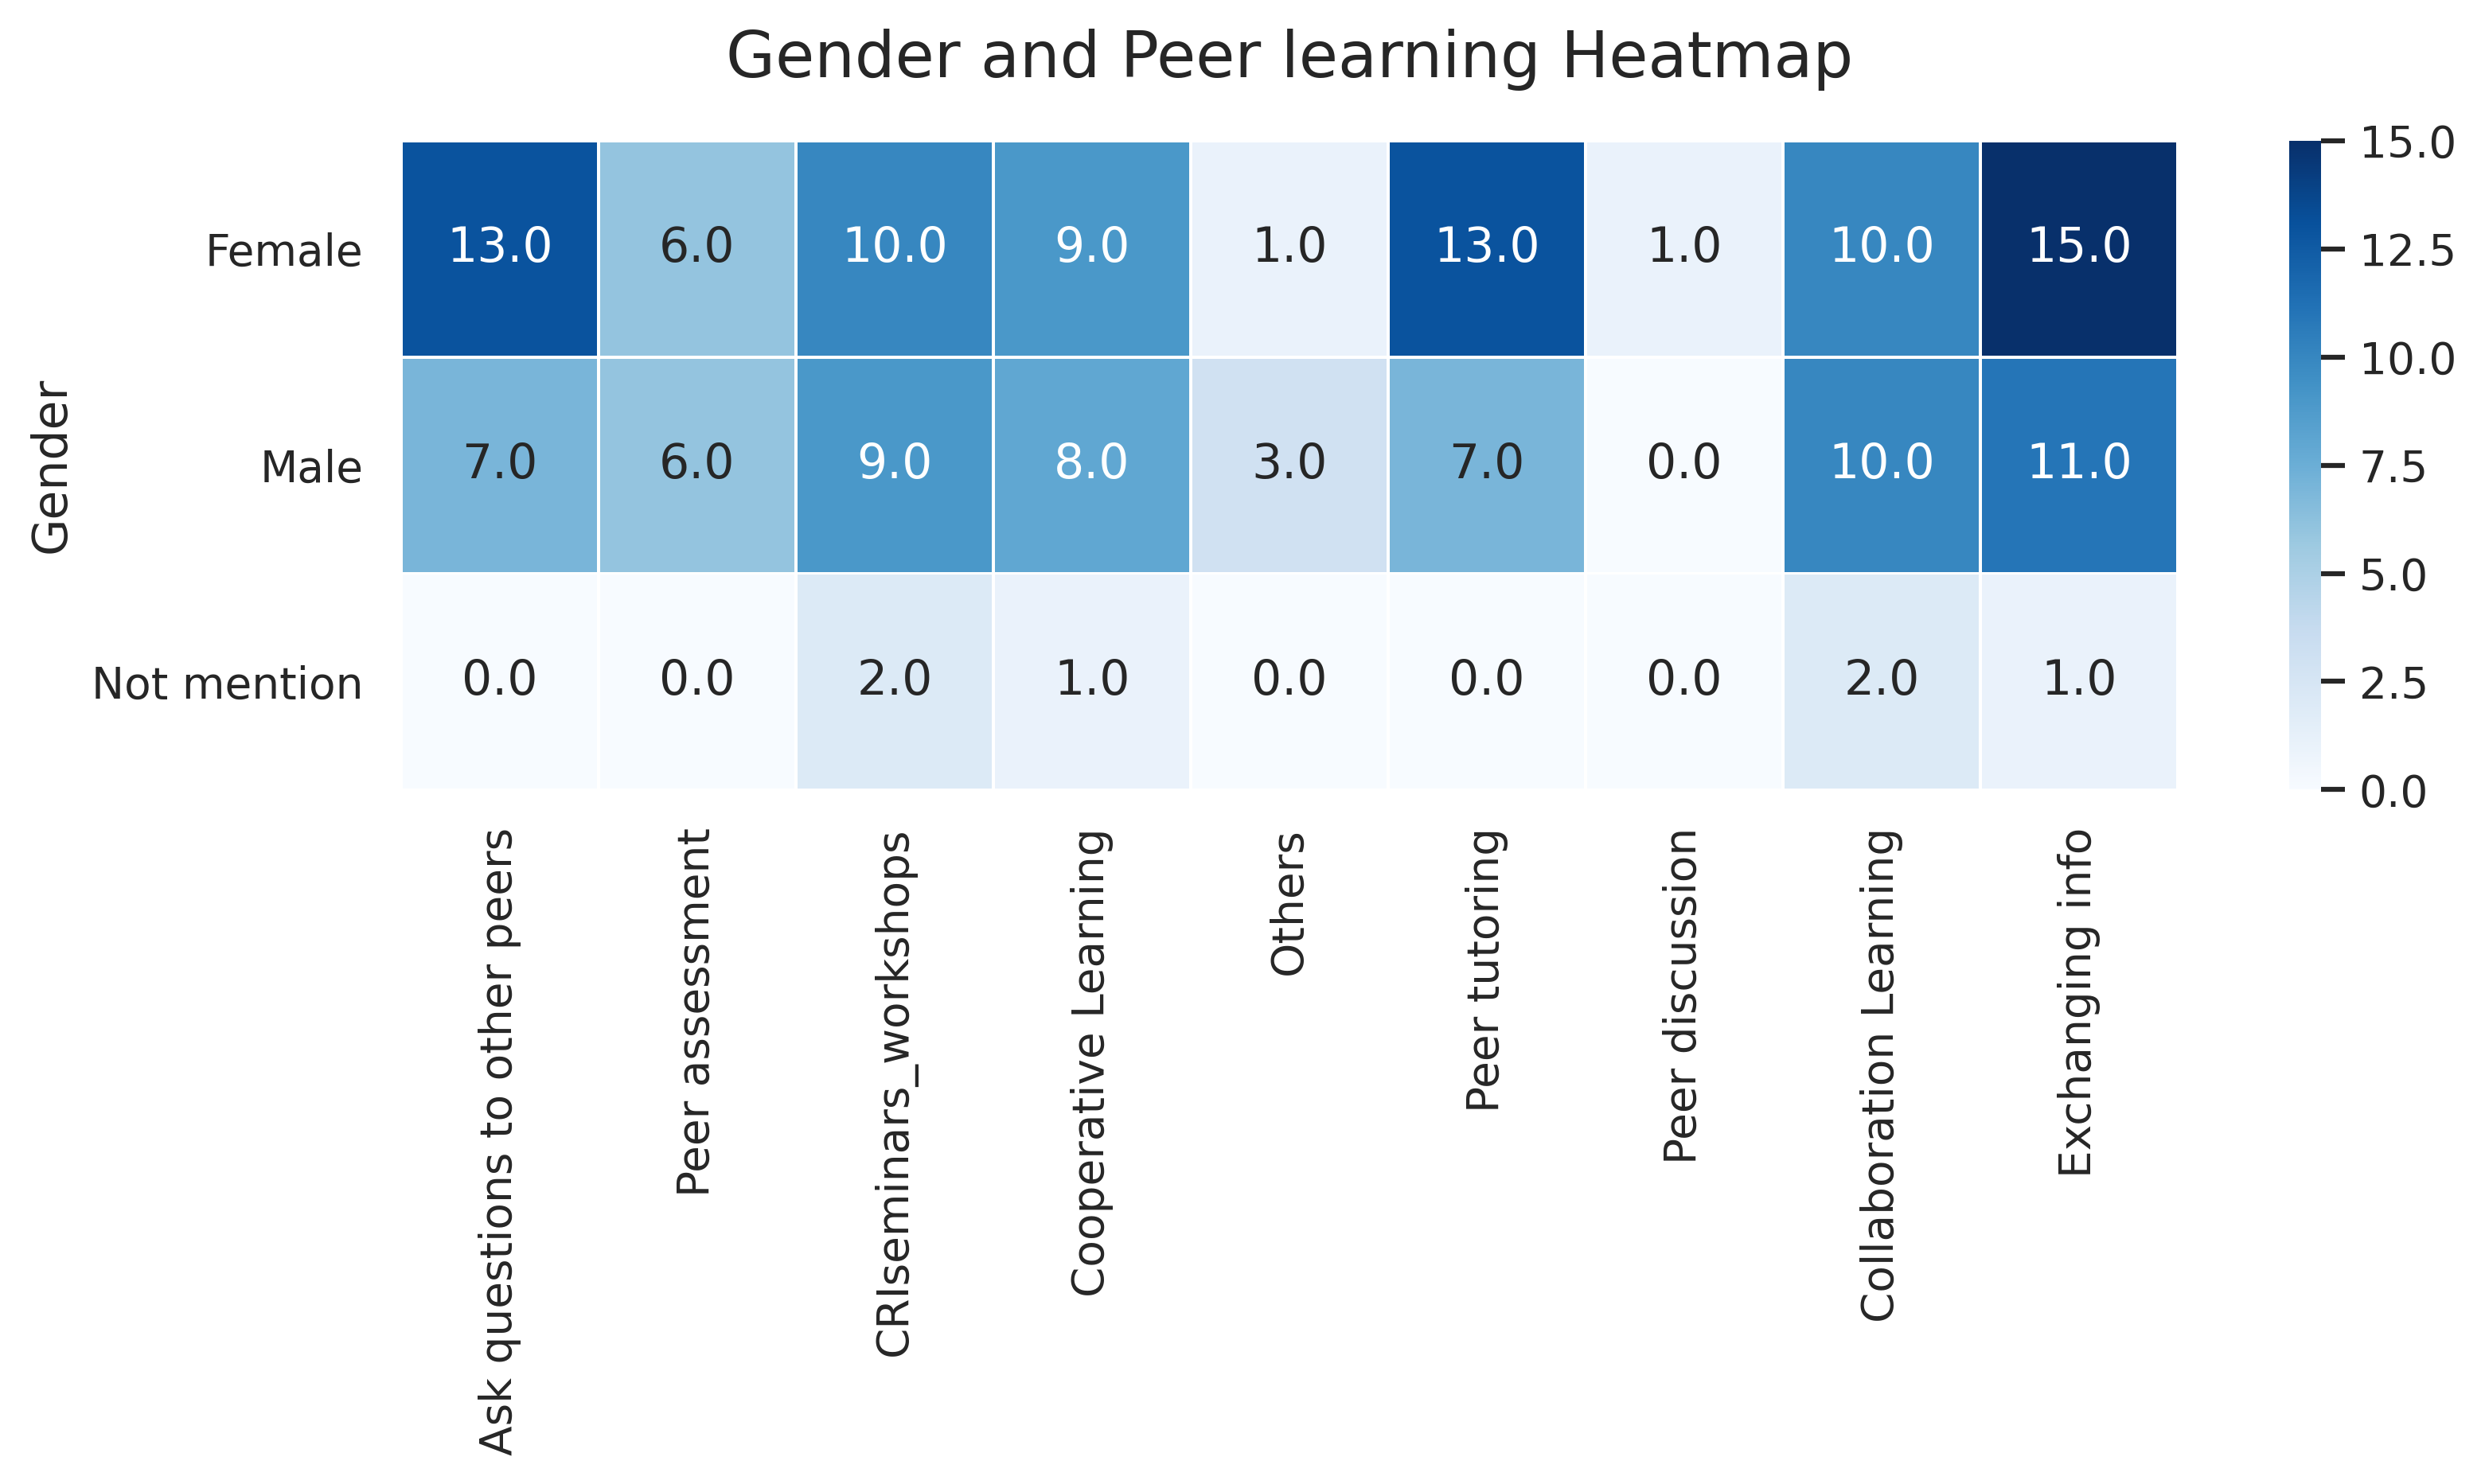

In [192]:
#set size
plt.figure(figsize=(10,3))

#plot
x=sns.heatmap(gender_PL, annot=True,linewidths=0.5, fmt=".1F",  cmap = 'Blues', annot_kws={"size": 12})
#plt.xlabel('Online Tools')
plt.ylabel('Gender')
plt.yticks(rotation='horizontal')
x.set_title('Gender and Peer learning Heatmap', fontdict={'fontsize':16}, pad=16)
plt.show() 


# Correlation between online tools

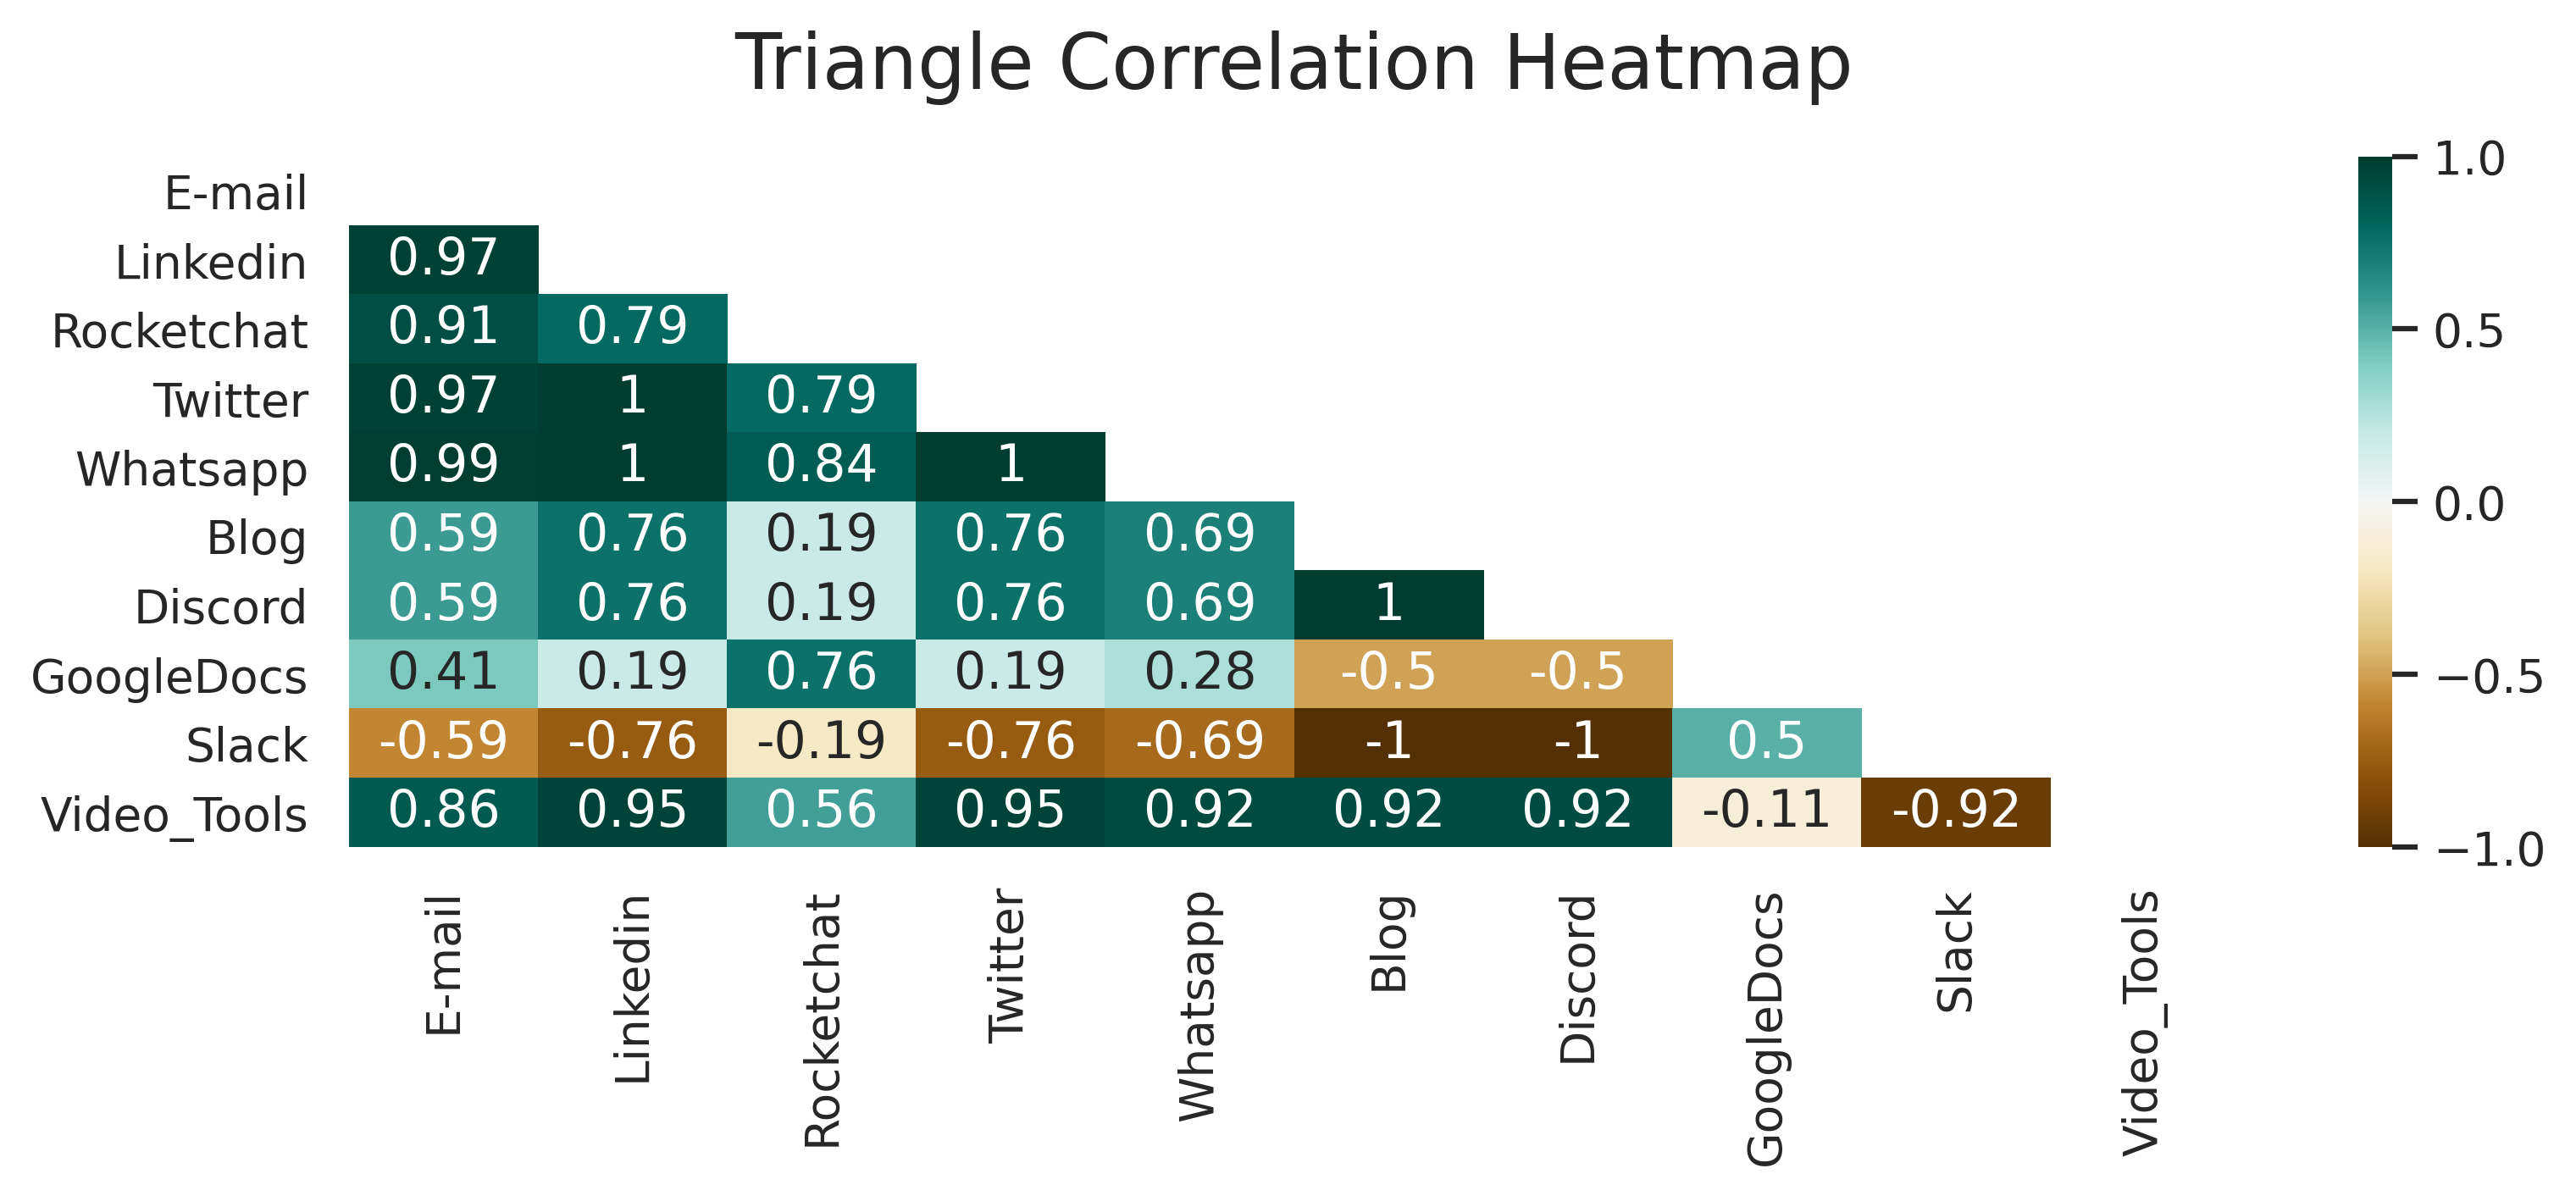

In [195]:
#set size
plt.figure(figsize=(10,3))
 
mask = np.triu(np.ones_like(gender_tools.corr(), dtype=np.bool))

heatmap = sns.heatmap(gender_tools.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0bdd5758-ff28-4606-be5d-50af4debf937' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>